# PROYECTO FINAL DATA SCIENCE III NLP

Para éste Proyecto Final, he tomado el dataset de la url https://mcauleylab.ucsd.edu/public_datasets/data/amazon_2023/raw/review_categories/Software.jsonl.gz,

Me interesa el dataset relacionado a Software, que de alguna manera, está vinculado a nuestra temática. El mundo de la IT.

Verifico que el dataset es muy grande y se me dificulta manejarlo, por las limitaciones de los recursos del Notebobook.

Entonces. Planteo: ¿Puedo Seleccionar el 20% del dataset original? ¿Sería mejor que sea aleatorio, para evitar sesgos?

Sí. Es mejor seleccionar el 20% del dataset original, de forma aleatoria para evitar sesgos.

Si selecciono las filas de forma no aleatoria, podría introducir sesgos en el análisis, ya que la muestra podría no ser representativa del dataset completo.

Para seleccionar el 20% del dataset original de forma aleatoria, podemos usar la función sample() de Pandas con el argumento frac=0.20.

Razonamiento:

* frac=0.20: Indica que quieres seleccionar el 20% de las filas del DataFrame.
*
random_state=42: Este argumento asegura que la selección aleatoria sea reproducible. Si ejecutas el código varias veces con el mismo valor para random_state, obtendrás la misma muestra aleatoria. Puedes usar cualquier número entero como valor para random_state.

**Ejemplo**:

Si el DataFrame original df tiene 100,000 filas, df_reducido tendrá 20,000 filas seleccionadas aleatoriamente.

**Ventajas de la selección aleatoria:**

* Reduce el sesgo: Asegura que la muestra sea representativa del dataset completo y reduce la posibilidad de introducir sesgos en el análisis.
* Mejora la eficiencia: Al trabajar con un dataset más pequeño, se reduce el tiempo de procesamiento y los recursos necesarios.

**Consideraciones:**

* Si el dataset tiene una estructura particular, (por ejemplo, datos ordenados cronológicamente), es posible que necesitemos usar una técnica de muestreo más sofisticada, para asegurar que la muestra sea representativa.
* Si necesitamos una muestra específica de filas (por ejemplo, las primeras 10,000 filas), podemos usar otras técnicas de selección de filas en Pandas, como iloc o head.

In [1]:
%%time
import gzip
import json
import string

import nltk # imports the natural language toolkit
import pandas as pd
import plotly
import plotly.express as px

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


CPU times: user 3.52 s, sys: 462 ms, total: 3.99 s
Wall time: 4.54 s


True

In [2]:
!pip install seaborn

In [3]:
import requests
import pandas as pd
import gzip
import json

# 1. Obtener el tamaño del dataset antes de descargarlo:
# url = "https://mcauleylab.ucsd.edu/public_datasets/data/amazon_2023/raw/review_categories/Software.jsonl.gz"
# response = requests.head(url)
# file_size = int(response.headers.get('content-length', 0))
# print(f"El tamaño del dataset es: {file_size} bytes")
# file_size_mb = file_size / (1024 * 1024)
# print(f"El tamaño del dataset es: {file_size_mb:.2f} MB")

# 2. Descargar y leer el dataset en chunks:

# response = requests.get(url, stream=True)
# chunksize = 35  # Puedes ajustar este valor según tus necesidades
# dfs = []

# with gzip.open(response.raw, 'rt', encoding='utf-8') as f:
#     for i, chunk in enumerate(pd.read_json(f, lines=True, chunksize=chunksize)):
#         print(f"Procesando chunk {i+1}...")
#         dfs.append(chunk)

# df = pd.concat(dfs, ignore_index=True)

# 3. Seleccionar aleatoriamente el 20% del dataset:
# df_reducido = df.sample(frac=0.20, random_state=42)

# Ahora puedes trabajar con 'df_reducido'
# print(f"El tamaño del dataset reducido es: {len(df_reducido)} filas")

**Explicación del código**:

1. **Obtener tamaño del dataset:** Se usa requests.head() para obtener la cabecera del archivo y extraer el tamaño del archivo de la cabecera content-length.
2. **Descargar y leer en chunks:** Se usa requests.get() con stream=True para descargar el archivo en partes (chunks). Luego se itera sobre los chunks usando pd.read_json() con lines=True y chunksize para leer el archivo JSON línea por línea en bloques de chunksize filas. Los chunks se van agregando a la lista dfs. Finalmente, se concatenan todos los DataFrames de la lista dfs en un único DataFrame df.
3. **Seleccionar muestra aleatoria**: Se usa df.sample() con frac=0.20 para seleccionar aleatoriamente el 20% de las filas del DataFrame df y crear un nuevo DataFrame df_reducido. El argumento random_state=42 asegura que la selección sea reproducible.
4. **Trabajar con el dataset reducido:** Ahora podemos usar df_reducido para nuestro análisis.

Podemos ajustar el valor de chunksize según las necesidades y la capacidad de memoria del entorno Colab. Si tenemos problemas de memoria, podemos reducir el valor de chunksize, para procesar el dataset en chunks más pequeños.



---



In [ ]:
# import pandas as pd
# from google.colab import drive

# Montar Google Drive
# drive.mount('/content/drive')

# Ruta al archivo en Google Drive
# file_path = '/content/drive/My Drive/CODERHOUSE/DATA SCIENCE III COMISIÓN 61715/df_reducido.csv'

# Leer el archivo CSV en un DataFrame
# df_reducido = pd.read_csv(file_path)

**Ahora tengo la Estrategia:**

**Guardar df_reducido, en Google Drive y cargarlo después.**

**Pienso que es una excelente idea para acelerar el flujo de trabajo.**


In [4]:
# Primero necesitamos montar Google Drive al Colab.
# Para poder acceder a archivos almacenados en Drive, directamente, desde Colab.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Definir el path o camino, (carpeta), donde queremos grabar el archivo, en el Drive

# file_path = '/content/drive/My Drive/CODERHOUSE/DATA SCIENCE III COMISIÓN 61715/df_reducido.csv'

# Guardar o grabar the DataFrame a un archivo CSV file
# df_reducido.to_csv(file_path, index=False)



---



# CARGANDO DESDE GOOGLE DRIVE

Ahora cuendo querramos trabajar con el dataframe posteriormente, podemos cargarlo directamente desde el Drive.

In [5]:
import pandas as pd

# Carga el DataFrame original reducido (el 20% que ya tienes)
df_reducido = pd.read_csv('/content/drive/My Drive/CODERHOUSE/DATA SCIENCE III COMISIÓN 61715/df_reducido.csv')

# --- ¡NUEVO PASO! ---
# Reduce el dataset aún más (ejemplo: al 50% del dataset reducido actual,
# lo que sería el 10% del dataset original)
df_super_reducido = df_reducido.sample(frac=0.25, random_state=42) # Selecciona 25% del dataset actual

# Ahora trabaja con df_super_reducido para el preprocesamiento y entrenamiento
print(f"Tamaño del dataset súper reducido: {len(df_super_reducido)} filas")

Tamaño del dataset súper reducido: 244009 filas


In [6]:
# Guardar o grabar the DataFrame a un archivo CSV file
# Define the file path before using it
file_path_super_reducido = '/content/drive/My Drive/CODERHOUSE/DATA SCIENCE III COMISIÓN 61715/df_super_reducido.csv'

df_super_reducido.to_csv(file_path_super_reducido, index=False)

print(f"DataFrame df_super_reducido guardado exitosamente en: {file_path_super_reducido}")

DataFrame df_super_reducido guardado exitosamente en: /content/drive/My Drive/CODERHOUSE/DATA SCIENCE III COMISIÓN 61715/df_super_reducido.csv


# **Lo reduzco al 5% del original, porque se cae la máquina virtual, (Satura la RAM).**

In [ ]:
# import pandas as pd

# Load the DataFrame from the CSV file
# df_reducido = pd.read_csv('/content/drive/My Drive/CODERHOUSE/DATA SCIENCE III COMISIÓN 61715/df_reducido.csv')

La estrategia que propongo es de guardar un df_super_reducido, en Google Drive y cargarlo después es una muy buena idea, para acelerar el flujo de trabajo.

Ventajas de hacerlo así:

Ahorro de tiempo: Evitar tener que volver a ejecutar el proceso de descarga, lectura y reducción del dataset original, cada vez que quiera trabajar con él.

La lectura inicial, como bien mencionamos, puede ser bastante lenta.

Reproducibilidad: Al guardar una versión preprocesada de los datos, aseguramos que estamos trabajando, con la misma muestra en diferentes sesiones.

Eficiencia: Si el análisis requiere múltiples iteraciones o experimentos, cargar el dataset preprocesado desde Drive, será mucho más rápido que volver a procesarlo cada vez.

Recomendaciones adicionales:

Nombre descriptivo: Asegurarnos de darle al archivo un nombre claro y descriptivo, por ejemplo, Software_reducido_20porciento.csv, para que podamos identificarlo fácilmente.

Organización: Crear una carpeta específica, dentro de mi Google Drive, para almacenar los datasets y otros archivos relacionados con mi proyecto, para mantener todo organizado.

# Continuemos directamente con al análisis del df_super_reducido, para que nos sea mas manejable.

# Vamos a aclarar el significado de cada columna según la información proporcionada por df_super_reducido.info():

**rating:** Es la calificación que el usuario le dio al producto. Es un valor numérico, probablemente en una escala de 1 a 5, donde 5 es la calificación más alta.

**title:** Es el título de la reseña escrita por el usuario. Es una breve descripción del tema principal de la reseña.

**text:** Es el cuerpo principal de la reseña, donde el usuario describe en detalle, su experiencia con el producto.

**images:** Parece contener información sobre imágenes asociadas con la reseña. Puede ser una lista de URLs o identificadores de imágenes.

**asin:** Es el Número de Identificación Estándar de Amazon (Amazon Standard Identification Number), que identifica de forma única, al producto que se está revisando.

**parent_asin:** Puede referirse al ASIN del producto principal, si el producto que se está revisando, es una variación (por ejemplo, un color o tamaño diferente).

**user_id:** Es un identificador único, para el usuario que escribió la reseña.

**timestamp**: Es la fecha y hora en que se envió la reseña. Está en formato de fecha y hora (datetime64[ns]).

**helpful_vote:** Es el número de votos útiles, que recibió la reseña de otros usuarios. Indica cuántas personas encontraron la reseña útil.

**verified_purchase:** Indica si la reseña, fue escrita por un comprador verificado del producto. Es un valor booleano (Verdadero o Falso).

En resumen: El DataFrame df_super_reducido, contiene información sobre las calificaciones, títulos, textos, imágenes, identificadores de productos y usuarios, marcas de tiempo y si la compra fue verificada, para las reseñas de productos de software en Amazon.

**Análisis Exploratorio:**

Podemos realizar un análisis exploratorio de datos (EDA) básico, utilizando las funciones de Pandas como describe(), info(), hist(), boxplot(), etc. Por ejemplo:

              rating  helpful_vote
count  244009.000000  244009.00000
mean        3.935256       4.82217
std         1.451851      32.57907
min         1.000000       0.00000
25%         3.000000       0.00000
50%         5.000000       0.00000
75%         5.000000       2.00000
max         5.000000    4320.00000
<class 'pandas.core.frame.DataFrame'>
Index: 244009 entries, 689617 to 393956
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   rating             244009 non-null  int64 
 1   title              243920 non-null  object
 2   text               243905 non-null  object
 3   images             244009 non-null  object
 4   asin               244009 non-null  object
 5   parent_asin        244009 non-null  object
 6   user_id            244009 non-null  object
 7   timestamp          244009 non-null  object
 8   helpful_vote       244009 non-null  int64 
 9   verified_purchase  244009 non-null  bool 

<Axes: xlabel='Customer Rating (1-5 scale)', ylabel='Frequency'>

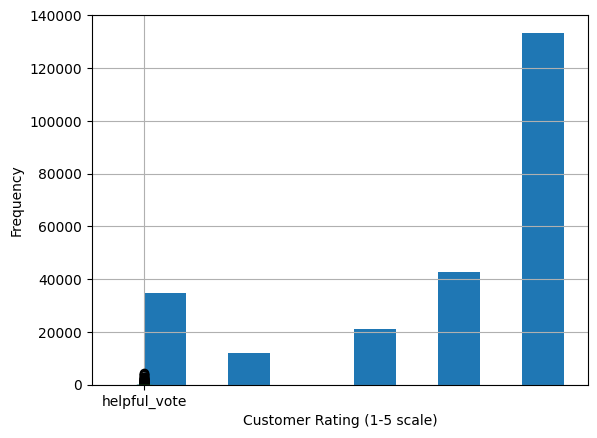

In [7]:
# Estadísticas descriptivas
print(df_super_reducido.describe())

# Información del DataFrame
print(df_super_reducido.info())

# Histograma de la variable 'rating'
df_super_reducido['rating'].hist()

# Boxplot de la variable 'helpful_vote'
df_super_reducido.boxplot(column='helpful_vote', xlabel='Customer Rating (1-5 scale)', ylabel='Frequency')

In [8]:
df_super_reducido.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
689617,5,"I don't know why, but it's amazing",It entertains me for hours... sometimes. It i...,[],B006KS544S,B006KS544S,AFKTEC7FRWAT7H22PSKY4BTMTUWQ,2013-03-01 19:07:38.000,0,True
566392,5,"Yes, Candy Crush just got better!!",Didn't think any of the Candy Crushes could ge...,[],B07J6FHM6J,B07J6FHM6J,AGTC6WG4UI5QYCDM5AAT2C4J2U5Q,2018-10-13 01:49:09.533,7,True
736758,5,love it,I love this game,[],B00LKK2DRC,B00LKK2DRC,AHVDAXKQPRJNGY6AWZI7GSCUIBSQ,2015-05-14 03:03:46.000,0,True
452753,5,Perfect for my tween,Love that my kiddo can text me without him nee...,[],B0765MX9NB,B0765MX9NB,AFTZ66FYCTYBI2IT2SW5BNN7AT5A,2020-02-24 03:02:55.295,25,True
529837,5,Real sound,Love the sounds. It sounds just like the area ...,[],B00OTZKV2E,B00OTZKV2E,AGSTTFYEJEWDHUPMHHHSG5PCM5JQ,2015-06-22 21:31:35.000,0,True


In [9]:
df_super_reducido.shape

(244009, 10)

In [10]:
df_super_reducido.columns

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')

In [11]:
df_super_reducido.dtypes

,0
rating,int64
title,object
text,object
images,object
asin,object
parent_asin,object
user_id,object
timestamp,object
helpful_vote,int64
verified_purchase,bool


array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'helpful_vote'}>]], dtype=object)

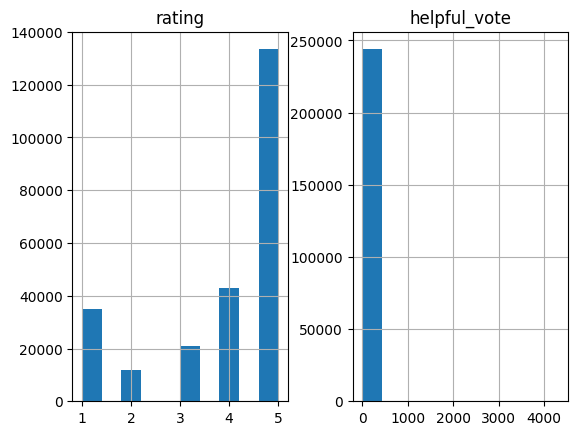

In [12]:
df_super_reducido.hist()

Ya hemos creado un histograma para la variable 'rating'.

Ahora, vamos a visualizar la distribución de otras variables relevantes, como 'helpful_vote' y la longitud del texto de las reseñas.

1. Distribución de 'helpful_vote':

Podemos usar un histograma para visualizar la distribución de 'helpful_vote':

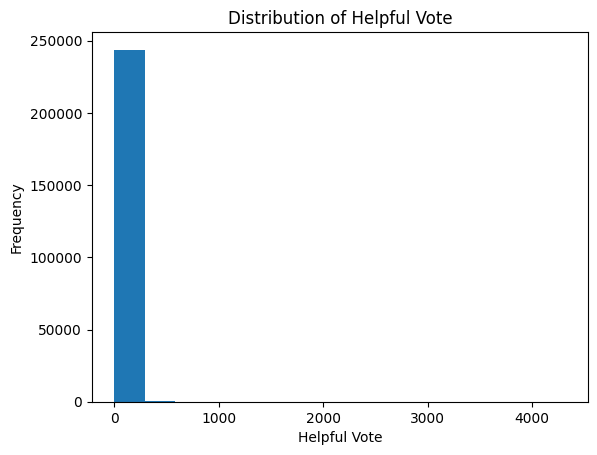

In [13]:
import matplotlib.pyplot as plt

plt.hist(df_super_reducido['helpful_vote'], bins=15)  # Ajusta el número de bins según sea necesario
plt.xlabel('Helpful Vote')
plt.ylabel('Frequency')
plt.title('Distribution of Helpful Vote')
plt.show()

**2. Distribución de la longitud del texto de las reseñas:**

Primero, necesitamos calcular la longitud de cada reseña. Podemos crear una nueva columna en el DataFrame, para almacenar esta información:

In [14]:
df_super_reducido['review_length'] = df_super_reducido['text'].astype(str).apply(len)
#The 'text' column is first converted to string type using astype(str) before applying len().
#This ensures that even if there are float values in the column, they will be treated as strings, and their length can be calculated without error.

**Siguiente Paso: Visualizar la Distribución de la Longitud de las Reseñas**

Ahora que hemos calculado con éxito las longitudes de las reseñas y las hemos almacenado en la columna 'review_length', el siguiente paso lógico sería explorar y visualizar esta nueva información.
Una sugerencia opción o sugerencia es:

Podems visualizar la distribución de la longitud de las reseñas, utilizando un histograma, similar a lo que hicimos para 'helpful_vote'.

Esto nos dará una idea de la longitud típica de las reseñas y de cualquier valor atípico.

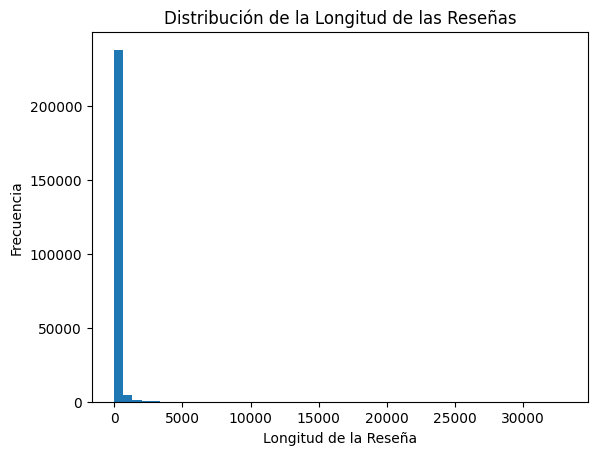

In [15]:
import matplotlib.pyplot as plt

plt.hist(df_super_reducido['review_length'], bins= 50)  # Ajusta el número de bins según sea necesario
plt.xlabel('Longitud de la Reseña')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Longitud de las Reseñas')
plt.show()

**Explicación:**

1. import matplotlib.pyplot as plt: Importa la librería para graficar.
2. plt.hist(df_super_reducido['review_length'], bins=50): Crea un histograma de los datos de la columna 'review_length' con 50 bins (intervalos). Puedes ajustar el número de bins para obtener una visualización más clara.
3. plt.xlabel('Longitud de la Reseña'): Establece la etiqueta para el eje x.
4. plt.ylabel('Frecuencia'): Establece la etiqueta para el eje y.
5. plt.title('Distribución de la Longitud de las Reseñas'): Establece el título del gráfico.
6. plt.show(): Muestra el histograma creado.


Al visualizar la distribución de la longitud de las reseñas, podemos obtener información como:

* Longitud promedio de las reseñas: Donde se encuentra el pico del histograma.
* Variación en la longitud de las reseñas: Qué tan dispersos están los datos.
* Presencia de valores atípicos: Reseñas extremadamente largas o cortas.

Esta información puede ser valiosa para análisis posteriores, como comprender la relación entre la longitud de la reseña y otras variables como la calificación o la utilidad.

También podríamos considerar usar esta información, para pasos de preprocesamiento como eliminar reseñas extremadamente cortas o largas si se consideran ruido o menos informativas.

Sigamos avanzando,

Ya hemos completado la primera parte de este paso, al calcular la longitud de cada reseña y almacenarla en la nueva columna 'review_length'.
Ahora, podemos proceder a la visualización de esta distribución.

**Visualizar la distribución de la longitud del texto de las reseñas**

Como mencionamos anteriormente, podemos usar un histograma para visualizar la distribución de la longitud del texto de las reseñas.

Esto nos dará una idea general de cómo se distribuyen, las longitudes de las reseñas:

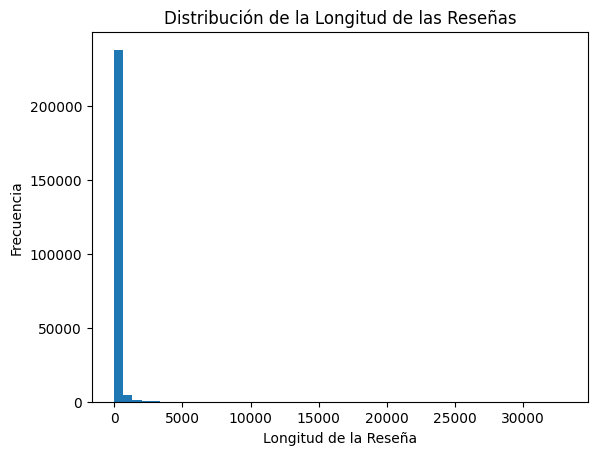

In [16]:
import matplotlib.pyplot as plt

plt.hist(df_super_reducido['review_length'], bins= 50)  # Ajusta el número de bins según sea necesario
plt.xlabel('Longitud de la Reseña')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Longitud de las Reseñas')
plt.show()

**Explicación del código:**

1. import matplotlib.pyplot as plt: Importa la librería matplotlib.pyplot para crear gráficos.
2. plt.hist(df_super_reducido['review_length'], bins=50):

Crearemos un histograma, utilizando los datos de la columna review_length del DataFrame df_reducido.
* bins=50: Dividiremos los datos en 50 intervalos (bins) para el histograma.
Podemos ajustar este valor para obtener una visualización más granular o más general.
3. plt.xlabel('Longitud de la Reseña'): Establece la etiqueta del eje x.
4. plt.ylabel('Frecuencia'): Establece la etiqueta del eje y.
5. plt.title('Distribución de la Longitud de las Reseñas'): Establece el título del gráfico.
6. plt.show(): Muestra el histograma generado.

**Interpretación del histograma:**

Al observar el histograma, podrás identificar:

* La longitud promedio de las reseñas: Se representa por el pico o la barra más alta del histograma.
* La variación en la longitud de las reseñas: Si el histograma es ancho, indica una gran variación en las longitudes. Si es estrecho, la variación es menor.
* La presencia de valores atípicos: Las barras aisladas en los extremos del histograma pueden indicar reseñas inusualmente largas o cortas.

Esta información nos ayudará a comprender mejor, la naturaleza de los datos y puede ser útil para tomar decisiones sobre el preprocesamiento de texto, como la eliminación de reseñas demasiado cortas o largas que podrían considerarse ruido.



---



**Relación entre Longitud de la Reseña y Calificación**

Como mencionamos antes, utilizaremos un diagrama de dispersión para visualizar la relación entre estas dos variables. El código para generar el gráfico es el siguiente:

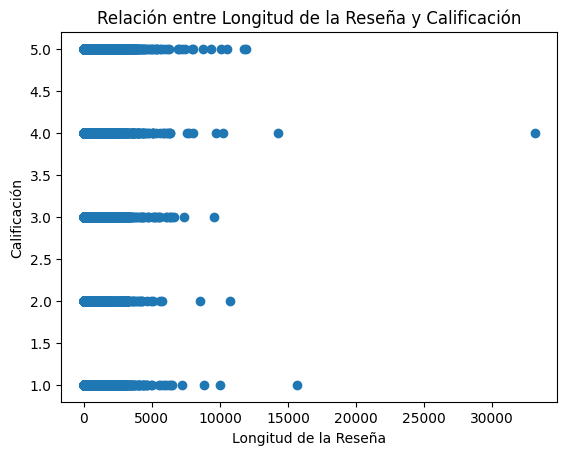

In [17]:
import matplotlib.pyplot as plt

plt.scatter(df_super_reducido['review_length'], df_super_reducido['rating'])
plt.xlabel('Longitud de la Reseña')
plt.ylabel('Calificación')
plt.title('Relación entre Longitud de la Reseña y Calificación')
plt.show()

**Explicación del código**:

1. import matplotlib.pyplot as plt: Importamos la librería matplotlib.pyplot para la creación de gráficos.
2. plt.scatter(df_super_reducido['review_length'], df_super_reducido['rating']): Creamos el diagrama de dispersión utilizando los datos de las columnas 'review_length' (longitud de la reseña) y 'rating' (calificación) del DataFrame df_reducido.
3. plt.xlabel('Longitud de la Reseña'): Establecemos la etiqueta para el eje x.
4. plt.ylabel('Calificación'): Establecemos la etiqueta para el eje y.
5. plt.title('Relación entre Longitud de la Reseña y Calificación'): Asignamos un título al gráfico.
6. plt.show(): Mostramos el gráfico generado.

**Interpretación del diagrama de dispersión:**

* **Patrones**: Observaremos si hay algún patrón o tendencia visible en la distribución de los puntos.
Por ejemplo, si los puntos tienden a agruparse en una línea ascendente o descendente, podría indicar una correlación positiva o negativa, respectivamente.
* **Concentración:** Debemos fijarnos en las áreas donde los puntos están más concentrados. Esto nos dará una idea de las longitudes de reseña y calificaciones más comunes.
* **Valores atípicos**: Identificar cualquier punto que se encuentre muy alejado del resto. Estos valores atípicos, podrían ser reseñas inusualmente largas o cortas con calificaciones extremas.

**Análisis posterior:**

Después de visualizar el diagrama de dispersión, podremos realizar un análisis más profundo, para cuantificar la relación entre las variables:

* **Correlación**: Calcular el coeficiente de correlación, entre 'review_length' y 'rating', para obtener una medida numérica de la relación lineal entre ellas.
* **Agrupación:** Dividir las reseñas en grupos, según su longitud (por ejemplo, cortas, medianas, largas) y comparar las calificaciones promedio de cada grupo

# **Análisis de lo realizado y insights**

Hasta ahora, hemos realizado las siguientes acciones:

1. **Carga y preparación de datos**: Hemos cargado el dataset df_super_reducido, el cual contiene un subconjunto de reseñas de productos de software de Amazon. Además, hemos creado una nueva columna llamada 'review_length' que almacena la longitud de cada reseña.
2. **Visualización de la distribución de variables**: Hemos visualizado la distribución de las variables 'helpful_vote' y 'review_length' utilizando histogramas.
3. **Exploración de la relación entre variables**: Hemos explorado la relación entre la longitud de la reseña ('review_length') y la calificación ('rating') utilizando un diagrama de dispersión.
**Insights obtenidos:**

* **Distribución de 'helpful_vote**': El histograma de 'helpful_vote' nos ha mostrado, que la mayoría de las reseñas tienen pocos votos útiles, y hay una menor cantidad de reseñas con una gran cantidad de votos útiles. Esto indica que la mayoría de las reseñas tienen un impacto limitado en la comunidad, mientras que unas pocas reseñas son consideradas especialmente útiles por otros usuarios.
* **Distribución de 'review_length'**: El histograma de 'review_length', nos ha mostrado la distribución de las longitudes de las reseñas. Hemos podido observar la longitud promedio de las reseñas, la variación en la longitud y la presencia de posibles valores atípicos, (reseñas extremadamente largas o cortas). Esto nos da una idea de la cantidad de texto que los usuarios suelen escribir en sus reseñas.
* **Relación entre 'review_length' y 'rating'**: El diagrama de dispersión, nos ha permitido visualizar la relación entre la longitud de la reseña y la calificación.
Podemos analizar si existe una correlación positiva o negativa entre estas dos variables, es decir, si las reseñas más largas o más cortas tienden a tener calificaciones más altas o más bajas. También podemos identificar posibles valores atípicos, como reseñas muy largas con bajas calificaciones o reseñas muy cortas con altas calificaciones.

# **Pasos a seguir**

Basándonos en los insights obtenidos, podemos continuar el análisis exploratorio de datos y profundizar en algunos aspectos:

1. **Cuantificar la relación entre 'review_length' y 'rating'**: Calcular el coeficiente de correlación entre estas variables para obtener una medida numérica de la relación lineal. Esto nos ayudará a confirmar o refutar las observaciones del diagrama de dispersión.
2. **Agrupación de reseñas**: Dividir las reseñas en grupos, según su longitud (cortas, medianas, largas) y comparar las calificaciones promedio de cada grupo. Esto puede proporcionar información más detallada sobre cómo la longitud de la reseña, afecta la calificación.
3. **Análisis de texto**: Explorar el contenido de las reseñas utilizando técnicas como la nube de palabras y el análisis de sentimiento. Esto nos permitirá comprender mejor los temas principales que se discuten en las reseñas y la opinión general de los usuarios sobre los productos.
4. **Análisis de otras variables**: Investigar la influencia de otras variables como 'verified_purchase' y 'timestamp' en la calificación y la utilidad de las reseñas.
5. **Preprocesamiento de texto**: Realizar tareas de limpieza y preprocesamiento del texto, (eliminar caracteres especiales, convertir a minúsculas, eliminar stop words, tokenización, lematización/stemming), para preparar el texto para análisis más avanzados.

**Recomendaciones:**

* Priorizar los pasos a seguir según los objetivos del análisis y las preguntas que se quieren responder.
* Documentar los hallazgos y las interpretaciones de los resultados en cada paso.
* Visualizar los datos de manera clara y efectiva para comunicar los resultados.

Dado que el preprocesamiento de texto, es un requisito fundamental para el trabajo práctico y para el uso de Deep Learning, debemos reajustar los puntos a realizar para priorizarlo.

Presento una propuesta de cómo reajustar los pasos:

# **Pasos a seguir reajustados**
1. **Preprocesamiento de texto**:

* Convertir a minúsculas.
* Eliminar puntuación.
* Eliminar stop words.
* Tokenización.
* Lematización/Stemming (opcional, pero recomendado para Deep Learning).

2. **Análisis de texto (después del preprocesamiento)**:

* Nube de palabras, (usando el texto preprocesado).
* Análisis de sentimiento, (usando el texto preprocesado).
3. **Exploración de la relación entre variables (usando el texto preprocesado si es relevante)**:

* Cuantificar la relación, entre la longitud de la reseña (calculada con el texto preprocesado) y la calificación.
* Agrupación de reseñas, (según la longitud del texto preprocesado).
* Relación entre la longitud de la reseña, (texto preprocesado) y la utilidad.
* Relación entre la calificación y la utilidad.
4. **Análisis de otras variables**:

* Explorar la variable 'verified_purchase'.
* Analizar la variable 'timestamp'.

5. **Deep Learning**:

* Una vez que el preprocesamiento y el análisis exploratorio estén completos, podremos usar el texto preprocesado, para entrenar el modelo de Deep Learning.
***Razones para el reajuste:***

* **El preprocesamiento es esencial**: Para que el modelo de Deep Learning, pueda aprender patrones significativos del texto, es crucial que los datos estén limpios y estructurados.
* **Análisis más preciso**: El análisis de texto, (nube de palabras, análisis de sentimiento), será más preciso y relevante si se realiza con el texto preprocesado, ya que se eliminará el ruido y se destacarán las palabras clave.
* **Mejor rendimiento del modelo**: Un preprocesamiento adecuado, puede mejorar significativamente el rendimiento del modelo de Deep Learning.

En resumen, la idea es:

* **Preprocesar el texto primero.**
* **Realizar el análisis exploratorio utilizando el texto preprocesado**.
* **Finalmente, entrenar el modelo de Deep Learning, con los datos preprocesados.**

# 1.**Preprocesamiento de Texto**`

Como ya hemos discutido, el preprocesamiento de texto, es fundamental para preparar los datos, para el análisis y el modelado, especialmente con Deep Learning.

A continuación, dejo el código, para realizar los pasos del preprocesamiento que mencionamos:

In [18]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

# 1. Convertir a minúsculas
df_super_reducido['text_processed'] = df_super_reducido['text'].astype(str).str.lower() # Convert to string before applying str.lower()

# 2. Eliminar puntuación
df_super_reducido['text_processed'] = df_super_reducido['text_processed'].str.replace('[{}]'.format(string.punctuation), '', regex=True)

# 3. Eliminar stop words
stop_words = set(stopwords.words('english'))
df_super_reducido['text_processed'] = df_super_reducido['text_processed'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# 4. Tokenización
df_super_reducido['text_processed'] = df_super_reducido['text_processed'].apply(lambda x: x.split())

# 5. Lematización (opcional, pero recomendado)
lemmatizer = WordNetLemmatizer()
df_super_reducido['text_processed'] = df_super_reducido['text_processed'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# 2. **Análisis de texto (después del preprocesamiento)**:

* **Nube de palabras (usando el texto preprocesado)**:

In [19]:
!pip install wordcloud

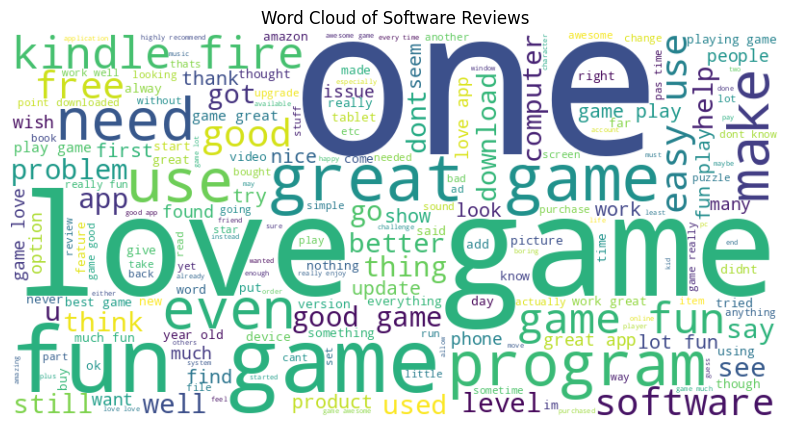

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all preprocessed text into a single string
all_text = ' '.join([' '.join(review) for review in df_super_reducido['text_processed']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Software Reviews')
plt.show()

**Install the wordcloud package:**

* **Análisis de Sentimiento (usando el texto preprocesado):**

 Para Análisis de Sentimiento, podemos utilizar librerías, como **TextBlob or VADER (Valence Aware Dictionary and sEntiment Reasoner)**.

 Este código utiliza TextBlob, para determinar la polaridad del sentimiento de cada reseña (positiva, negativa o neutral).

In [21]:
!pip install textblob

count    244009.000000
mean          0.195141
std           0.303592
min          -1.000000
25%           0.000000
50%           0.166667
75%           0.400000
max           1.000000
Name: sentiment, dtype: float64


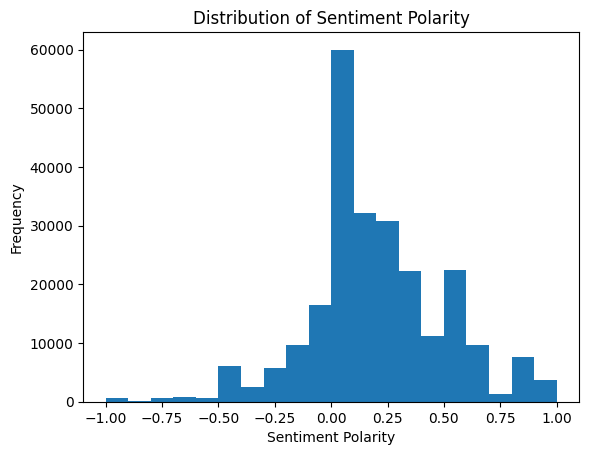

In [22]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    blob = TextBlob(' '.join(text)) # Join tokens back into a string / Unir tokens en una cadena
    return blob.sentiment.polarity

# Apply sentiment analysis to the preprocessed text
df_super_reducido['sentiment'] = df_super_reducido['text_processed'].apply(get_sentiment)

# Explore sentiment distribution
print(df_super_reducido['sentiment'].describe())
plt.hist(df_super_reducido['sentiment'], bins=20)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity')
plt.show()

3. **Exploración de la relación entre variables (usando el texto preprocesado si es relevante)**:

* **Recalcula review_length, basado en el texto preprocesado:**

In [23]:
df_super_reducido['review_length'] = df_super_reducido['text_processed'].apply(len)

Este código recalcula la longitud de cada reseña, pero ahora utilizando el texto preprocesado. Es decir, se cuenta la cantidad de palabras, (tokens), después de haber realizado la limpieza y las transformaciones en el texto.

**En resumen:**

El código realiza un análisis de texto básico, utilizando la información preprocesada de las reseñas.

Primero, genera una nube de palabras para visualizar las palabras más frecuentes.

Luego, realiza un análisis de sentimiento para determinar la polaridad de las reseñas.

Finalmente, recalcula la longitud de las reseñas utilizando el texto preprocesado, lo que permitirá un análisis más preciso de la relación entre la longitud y otras variables.

Considerando que se nos ha enseñado, que las Principales tareas del NLP son:

*Análisis de sentimiento,

*Name Entity Recognition (NER),

*Stemming y Lemmantization,

*Bag of Words,

*TF-IDF

*Wordclouds.

O sea, debo elegir entre éstas opciones.

Dado que ya tenemos Wordclouds, (nube de palabras) y Análisis de sentimiento, veamos las opciones restantes y cuál sería la más adecuada, para el proyecto de análisis de reseñas de software:

Opciones restantes:

* **Name Entity Recognition (NER)**:

* Identifica y clasifica entidades nombradas en el texto, como personas, organizaciones, ubicaciones, fechas, etc.
* En nuestro caso, podría ser útil para extraer nombres de productos o compañías de software mencionadas en las reseñas. Sin embargo, es posible que no sea tan relevante como otras opciones, ya que el enfoque principal está en la opinión de los usuarios.
* **Stemming y Lemmatization**:

* Ya estamos utilizando Lemmatization, en el preprocesamiento. Stemming es similar, pero más agresivo y puede resultar en palabras con raíces menos precisas.
* No se consideran tareas de análisis en sí mismas, sino técnicas de preprocesamiento.
* **Bag of Words:**

* Representa un texto, como una colección de palabras, sin tener en cuenta el orden o la gramática.
* Es un paso previo a otras técnicas, como TF-IDF y puede ser útil para la clasificación de texto. Sin embargo, por sí solo, no proporciona un análisis profundo.
* **TF-IDF (Term Frequency-Inverse Document Frequency)**:

* Asigna pesos a las palabras, en un documento basándose en su frecuencia, en el documento y en todo el corpus.
* Es útil para identificar las palabras más relevantes de un documento y puede ser utilizado para la búsqueda de información, la clasificación de texto y la agrupación de documentos.

**Recomendación:**

Considerando las opciones restantes, es recomendable utilizar TF-IDF, para el tercer proceso de análisis de texto.

**Razones**:

1. **Relevancia**: TF-IDF nos permitirá identificar, las palabras más importantes y distintivas en cada reseña de software. Esto nos ayudará a entender mejor, el contenido de las reseñas y a encontrar patrones en el lenguaje utilizado por los usuarios.
2. **Complemento al análisis de sentimiento**: TF-IDF puede complementar el análisis de sentimiento al proporcionar información sobre las palabras clave, que contribuyen a la polaridad de la reseña.
Por ejemplo, podríamos identificar palabras, que son altamente predictivas, de reseñas positivas o negativas.
3. **Aplicaciones**: TF-IDF es una técnica ampliamente utilizada en NLP y puede servir como base, para análisis más avanzados, como la clasificación de texto o la agrupación de documentos.

**Implementación**:

Podemos usar la librería Scikit-learn, para calcular TF-IDF, en las reseñas preprocesadas.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crea un objeto TfidfVectorizer
vectorizer = TfidfVectorizer()

# Ajusta el vectorizador a tus reseñas preprocesadas
vectorizer.fit(df_super_reducido['text_processed'].apply(' '.join)) # Une los tokens de nuevo en una cadena

# Transforma las reseñas en vectores TF-IDF
tfidf_matrix = vectorizer.transform(df_super_reducido['text_processed'].apply(' '.join))

# Puedes explorar la matriz TF-IDF o utilizarla para otros análisis
print(tfidf_matrix)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2903208 stored elements and shape (244009, 88708)>
  Coords	Values
  (0, 13121)	0.35574227017956955
  (0, 28986)	0.4879046381541125
  (0, 31236)	0.2709073432383659
  (0, 34296)	0.14307912324199684
  (0, 34878)	0.10918524276395268
  (0, 40304)	0.2526595768452693
  (0, 63414)	0.30276642263247916
  (0, 72981)	0.2754144807159723
  (0, 74326)	0.3530092815131438
  (0, 75768)	0.29146197428918297
  (0, 88190)	0.2978078574941844
  (1, 6580)	0.2037630208739634
  (1, 12293)	0.1905668423129143
  (1, 13922)	0.18742345817290068
  (1, 17006)	0.28675391323427624
  (1, 18109)	0.2333864573232901
  (1, 18214)	0.2546674363980114
  (1, 18744)	0.25220834463389286
  (1, 21752)	0.1857877607439928
  (1, 22499)	0.2960127067794876
  (1, 24889)	0.20440906863087452
  (1, 24971)	0.2019483254785254
  (1, 35817)	0.27006596632599095
  (1, 37093)	0.20466079246050037
  (1, 47328)	0.12811964093715242
  :	:
  (244006, 7281)	0.3189080779218786
  (244006, 8645)	0

**Entendiendo la matriz TF-IDF**

El resultado que obtuvimos, tfidf_matrix, es una matriz dispersa, que representa las reseñas en un espacio vectorial. Cada fila de la matriz corresponde a una reseña y cada columna corresponde a una palabra única, (o término), del vocabulario de todas las reseñas.

Los valores dentro de la matriz representan **el puntaje TF-ID**F, para cada palabra en cada reseña. Este puntaje indica la importancia de una palabra en una reseña, en relación con todo el conjunto de reseñas.

**Interpretación de los valores TF-ID**F

* **Valores altos**: Un valor alto de TF-IDF para una palabra, en una reseña significa que esa palabra es:

* **Frecuente en esa reseña**: Aparece muchas veces dentro de esa reseña específica.
* **Rara en el conjunto de reseña**s: No aparece tan frecuentemente en las demás reseñas.
* **Por lo tanto, es una palabra importante para caracterizar esa reseña en particular**.

* **Valores bajos**: Un valor bajo de TF-IDF indica que la palabra:

* **Es poco frecuente en esa reseña**.
* **Es común en muchas reseñas (o stop word).**
* **Por lo tanto, no es tan importante para distinguir esa reseña.**

**Ejemplo:**

Imaginemos que tenemos una reseña que habla mucho sobre "interfaz" y "usuario", y estas palabras no aparecen tan frecuentemente en otras reseñas. Entonces, los valores TF-IDF para "interfaz" y "usuario" en esa reseña serán altos, indicando que son palabras clave para describir esa reseña.

Por otro lado, palabras como "el", "la", "un", (stop words), tendrán valores TF-IDF bajos en todas las reseñas, porque son muy comunes y no aportan mucha información distintiva.

**Utilizando la matriz TF-IDF**

La matriz TF-IDF que hemos generado, se puede utilizar para diferentes análisis, como:

* **Búsqueda de información**: Podemos usarla, para encontrar reseñas relevantes, a una consulta de búsqueda específica.
* **Clasificación de texto***: Podemos usarla, como entrada, para un modelo de clasificación de texto, donde se utilizará la información de las palabras clave, para predecir la categoría de una reseña.
* **Agrupación de documentos**: Podemoss usarla, para agrupar reseñas similares, en función de sus palabras clave.
+ **Análisis de temas**: Aunque no es una técnica de Topic Modeling formal, podemoss analizar las palabras con mayor TF-IDF, en un conjunto de reseñas, para obtener una idea general, de los temas que se están discutiendo.

**En resumen, los resultados obtenidos con TF-IDF nos brindan una representación numérica, de la importancia de las palabras en cada reseña. Estos valores son útiles para entender mejor, el contenido de las reseñas y para realizar diferentes tipos de análisis de texto**.

Hemos logrado un buen progreso:

* Preprocesamos el texto de las reseñas.
* Realizamos análisis de sentimiento.
* Generamos una nube de palabras.
* Aplicamos TF-IDF para identificar palabras clave.

Todo esto nos proporcionará una base sólida, para continuar con el proyecto. Posteriormente, podremos explorar las siguientes opciones:

1. **Visualizar los resultados de TF-IDF**: Podemos crear visualizaciones, como gráficos de barras o tablas, para mostrar las palabras con mayor puntaje TF-IDF en cada reseña o en grupos de reseñas. Esto nos ayudará a identificar patrones y temas importantes de forma más intuitiva.
2. **Utilizar la matriz TF-IDF para análisis posteriores**: Como mencionamos antes, podremos usarla para clasificación de texto, agrupación de documentos o análisis de temas más a fondo.
3. **Explorar la relación entre variables**: Ahora que tenemos la longitud de la reseña recalculada y los resultados de TF-IDF, podremos analizar, cómo se relacionan estas variables, con la calificación, la utilidad de la reseña, y el sentimiento.

**Ejemplo de código para visualizar la forma y una porción de la matriz TF-IDF:**

Forma de la matriz TF-IDF: (244009, 88708)


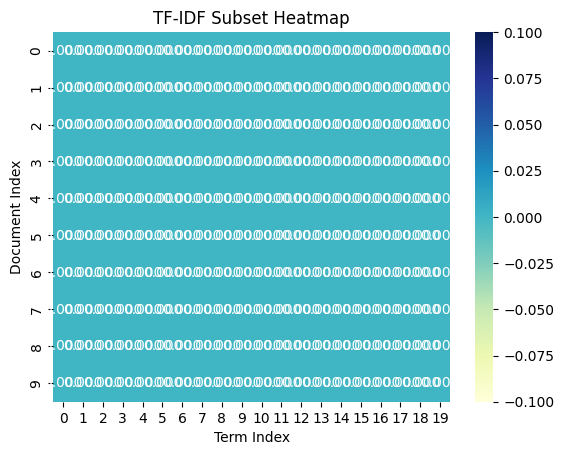

In [25]:
import seaborn as sns # Import the seaborn library
import matplotlib.pyplot as plt # Import matplotlib for displaying the plot
import pandas as pd # Import pandas to create a DataFrame from the matrix subset

print("Forma de la matriz TF-IDF:", tfidf_matrix.shape)  # dimensiones de la matriz

# Convert a subset of the sparse matrix to a dense array, then to a DataFrame
# This is necessary because seaborn.heatmap does not directly support sparse matrices
# Only convert the required subset to avoid memory issues with large matrices
tfidf_df_subset = pd.DataFrame(tfidf_matrix[:10, :20].todense())

# Visualiza un subconjunto de la matriz TF-IDF
sns.heatmap(tfidf_df_subset, annot=True, cmap="YlGnBu", fmt=".3f")  # adjust according to needs
plt.xlabel('Term Index') # Add x-axis label for clarity
plt.ylabel('Document Index') # Add y-axis label for clarity
plt.title('TF-IDF Subset Heatmap') # Add a title to the heatmap
plt.show()



---



El proyecto va bien, pero hay algunos puntos a revisar, especialmente los outliers.

# **Sobre los Outliers:**

1. **Contexto**: Los vimos en el histograma de la longitud de las reseñas (review_length). Algunos textos son extremadamente largos, lo que puede afectar algunos análisis.

2. **Solución**: Podemos manejarlos de varias maneras:

* **Eliminación**: Si son muy pocos y representan errores o casos excepcionales, podemos eliminarlos del dataset.
* **Truncamiento**: Podemos limitar la longitud máxima de las reseñas a un valor razonable. Las que superen ese límite se truncarían.
* **Transformación**: Aplicar una transformación logarítmica, por ejemplo, podría reducir la influencia de los valores extremos.

**Ajustes adicionales:**

Además de los outliers, es sugerible considerar:

1. **Visualizaciones de TF-IDF**: Si bien calculamos TF-IDF, sería útil visualizar los resultados, para una mejor interpretación. Podríamos graficar las palabras, con mayor puntaje TF-ID, por reseña o por grupos de reseñas.
2. **Relación entre variables**: Profundizar en la relación entre review_length, (texto preprocesado), calificación, utilidad, sentimiento y TF-IDF. Esto nos dará insights más valiosos.
3. **NER (opcional**): Si nos interesa, podríamos explorar NER, para identificar nombres de productos o compañías de software. Podría complementar el análisis.

**En resumen**:

El proyecto tiene una buena base, pero sería bueno:

1. Manejar los outliers de review_length.
2. Visualizar los resultados de TF-IDF.
3. Profundizar en las relaciones entre variables.
4. Considerar NER (opcional).

Con estos ajustes, el proyecto será aún más sólido y completo.

Vamos con los ajustes que discutimos:

1. **Manejo de Outliers en review_length**

Primero, visualicemos nuevamente el histograma para identificar los outliers:

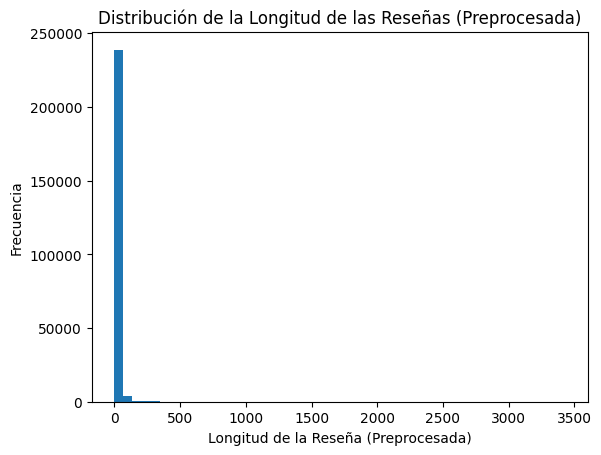

In [26]:
import matplotlib.pyplot as plt

plt.hist(df_super_reducido['review_length'], bins=50)
plt.xlabel('Longitud de la Reseña (Preprocesada)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Longitud de las Reseñas (Preprocesada)')
plt.show()

Observemos dónde se concentran la mayoría de las reseñas y dónde están los valores atípicos.

Luego, podemos aplicar un método para manejarlos. Por ejemplo, el **truncamiento**

In [27]:
max_length = 500  # Define la longitud máxima (ajusta según tus datos)
df_super_reducido['review_length_truncated'] = df_super_reducido['review_length'].apply(lambda x: min(x, max_length))

 Vamos a centrarnos en el punto 1: el manejo de outliers en review_length. Ya hemos aplicado truncamiento, pero antes de continuar, es importante **evaluar, la efectividad de esta técnica y explorar posibles alternativas.**

Pasos a seguir:

**Visualiza la distribución de review_length después del truncamiento:**

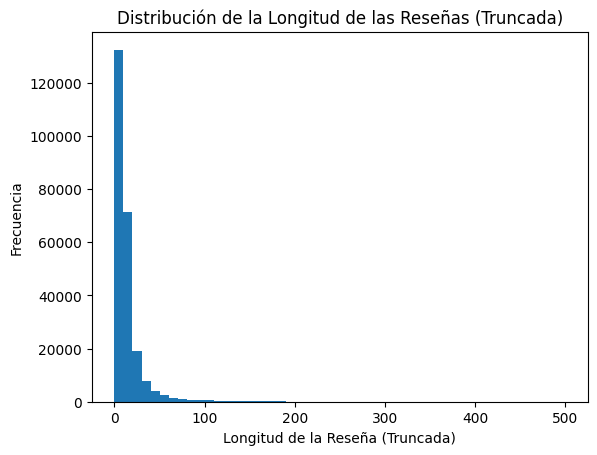

In [28]:
import matplotlib.pyplot as plt

plt.hist(df_super_reducido['review_length_truncated'], bins=50)
plt.xlabel('Longitud de la Reseña (Truncada)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Longitud de las Reseñas (Truncada)')
plt.show()

Este código crea una nueva columna review_length_truncated, donde las longitudes mayores a max_length se truncan a ese valor. Ajustemos max_lengt, según lo que observemos en el histograma.

Observemos el histograma y comparemos la distribución con la que teníamos antes del truncamiento.
¿Se ha reducido la influencia de los outliers? ¿La distribución es más "normal"?
Si el truncamiento no es suficiente, consideremos alternativas:

Eliminación: Si los outliers son muy extremos y representan errores o casos excepcionales, podríamoss eliminar las reseñas que superen un determinado umbral. deberemos definir el umbral, basándonos en el histograma y en el conocimiento del dominio.
Transformación: Si preferimos no eliminar datos, podríamoss aplicar una transformación logarítmica a review_length. Esto reduciría la influencia de los valores extremos sin eliminarlos.

Continuemos con las mejoras que identificamos en el código.

1. **Manejo de Outliers en review_length**:

* **Ajustar max_length**: Observemos el histograma de review_length_truncated y ajustemos el valor de max_length, para que el truncamiento sea efectivo, sin eliminar demasiada información. Si la mayoría de las reseñas tienen una longitud menor a un cierto valor, podremos usar ese valor como max_length.
* **Transformación logarítmica**: Si el truncamiento no es suficiente, apliquemos una transformación logarítmica a review_length, para reducir la influencia de los valores extremos. Podemos hacerlo con el siguiente código:

In [29]:
import numpy as np

df_super_reducido['review_length_log'] = np.log(df_super_reducido['review_length'] + 1)  # +1 para evitar log(0)

* **Evaluación**: Después de aplicar el truncamiento o la transformación, visualizemos nuevamente el histograma de review_length_truncated o review_length_log para verificar si la distribución ha mejorado.

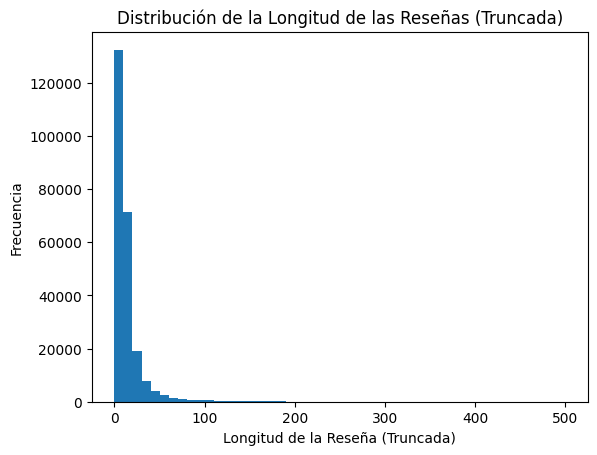

In [30]:
# Revisión de review_lenght_truncated
import matplotlib.pyplot as plt

plt.hist(df_super_reducido['review_length_truncated'], bins=50)
plt.xlabel('Longitud de la Reseña (Truncada)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Longitud de las Reseñas (Truncada)')
plt.show()

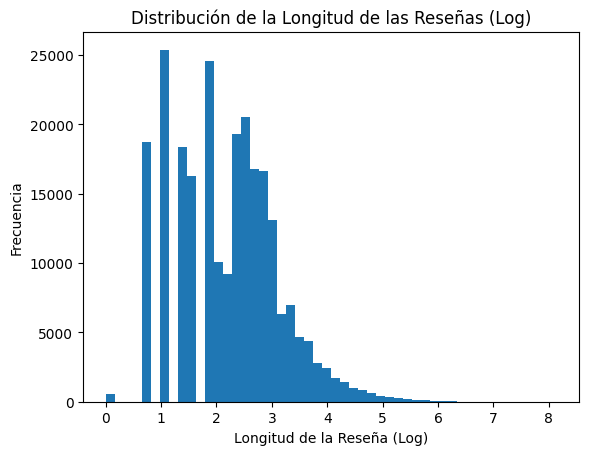

In [31]:
# Revisión de review_lenght_log
import matplotlib.pyplot as plt

plt.hist(df_super_reducido['review_length_log'], bins=50)
plt.xlabel('Longitud de la Reseña (Log)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Longitud de las Reseñas (Log)')
plt.show()

3. **Elijamos la mejor opción para el caso:**

* La mejor opción dependerá de la naturaleza de los datos y de los objetivos del análisis.
* Si los outliers son pocos y extremos, la eliminación podría ser la opción más sencilla.
* Si preferimos conservar todos los datos, la transformación podría ser más adecuada.
* Si el truncamiento ha sido suficiente, no es necesario hacer más cambios.

**Recordemos:**

* Es importante documentar la técnica que hemos utilizado para manejar los outliers.
* Justificar la elección basándonos en la visualización de los datos y en nuestro conocimiento del problema.
*Evaluar el impacto de la técnica en los análisis posteriores.

3. **Relación entre variables**

Utiliza diagramas de dispersión, boxplots o tablas de correlación para analizar las relaciones entre:

* review_length_truncated (o review_length si no aplicaste truncamiento)
* Calificación (rating)
* Utilidad (helpful_vote)
* Sentimiento (sentiment)
* Palabras clave identificadas con TF-IDF

Retomemos el punto **2**, **la visualización de los resultados de TF-IDF**.

Verifico que el tamaño del dataset, puede hacer que este proceso sea lento, pero vamos a intentar abordarlo de forma eficiente, para obtener información relevante.

**Opciones para visualizar TF-IDF sin que sea muy lento:**

1. **Mostrar las palabras con mayor TF-IDF en un subconjunto de datos**:
* En lugar de visualizar todas las palabras en todas las reseñas, podemos enfocarnos en las palabras con mayor TF-IDF, en un subconjunto del dataset. Por ejemplo, podríamos seleccionar las 100 reseñas con mayor o menor calificación, o una muestra aleatoria de 500 reseñas.

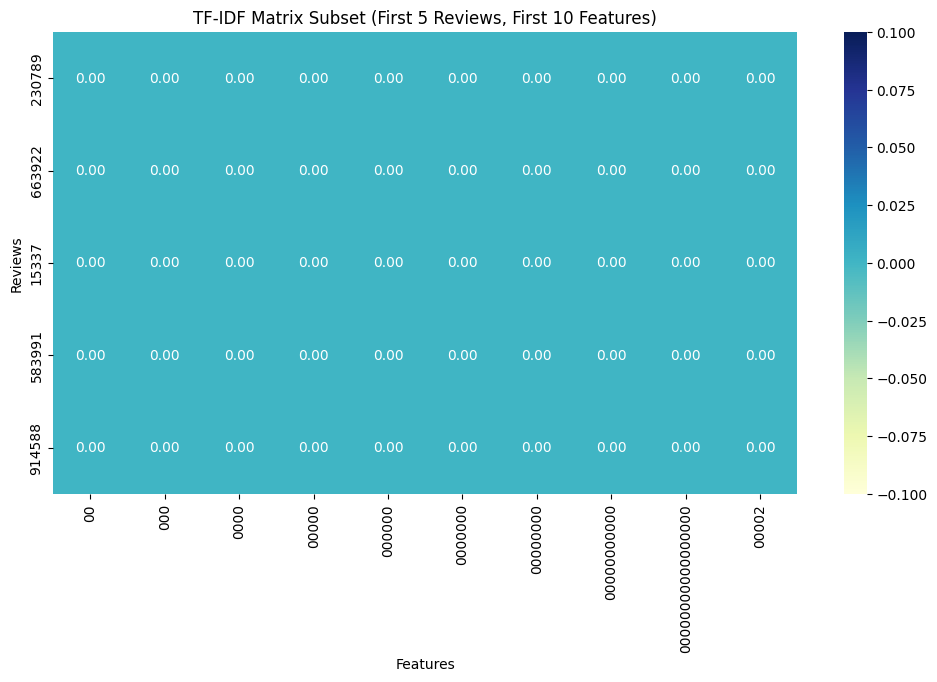

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already calculated TF-IDF for the full dataset and stored it in 'tfidf_matrix'

# Seleccionemos un subconjunto del DataFrame
subset_df = df_super_reducido.sample(n=500, random_state=42)  # Muestra aleatoria de 500 reseñas

# Calculamos TF-IDF para el subconjunto
tfidf_matrix_subset = vectorizer.transform(subset_df['text_processed'].apply(' '.join))

# Visualizar la matriz tfidf_matrix_subset usando seaborn
# Convertir la matriz dispersa a un array denso para la visualización
tfidf_matrix_subset_dense = tfidf_matrix_subset.toarray()

# Crear un DataFrame para la visualización
tfidf_df = pd.DataFrame(tfidf_matrix_subset_dense,
                         index=subset_df.index,
                         columns=vectorizer.get_feature_names_out())

# Visualizar una parte del DataFrame (por ejemplo, las primeras 5 filas y 10 columnas)
plt.figure(figsize=(12, 6))
sns.heatmap(tfidf_df.iloc[:5, :10], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('TF-IDF Matrix Subset (First 5 Reviews, First 10 Features)')
plt.xlabel('Features')
plt.ylabel('Reviews')
plt.show()


**Diagnóstico y solución del problema de valores en cero en TF-IDF:**
1. **Revisar el preprocesamiento:**

Imprimir algunas reseñas preprocesadas para verificar que contienen palabras significativas después de la limpieza. Por ejemplo:

In [33]:
print(df_super_reducido['text_processed'].head())

689617    [entertains, hour, sometimes, quick, game, fas...
566392    [didnt, think, candy, crush, could, get, much,...
736758                                         [love, game]
452753    [love, kiddo, text, without, needing, phone, y...
529837              [love, sound, sound, like, area, thing]
Name: text_processed, dtype: object


2. Ajustar la configuración del vectorizador:

Experimentar con diferentes valores para min_df y max_df en TfidfVectorizer. Por ejemplo, podríamos probar:

In [34]:
vectorizer = TfidfVectorizer(min_df=2, max_df=0.9)  # Ajusta los valores según tus datos

* min_df=2 significa que una palabra debe aparecer en al menos 2 documentos, para ser incluida en el vocabulario.
* max_df=0.9 significa que una palabra que aparece en más del 90% de los documentos, se ignorará. (para evitar palabras muy comunes que no aportan información).
3. Verificar la forma de la matriz y visualizar una porción:

Imprimir tfidf_matrix.shape para ver las dimensiones de la matriz.
Visualizar una pequeña porción de la matriz con un heatmap para detectar los valores no-cero y su rango. Podemos aumentar el tamaño de la porción visualizada para tener una mejor idea:

Forma de la matriz TF-IDF: (244009, 88708)


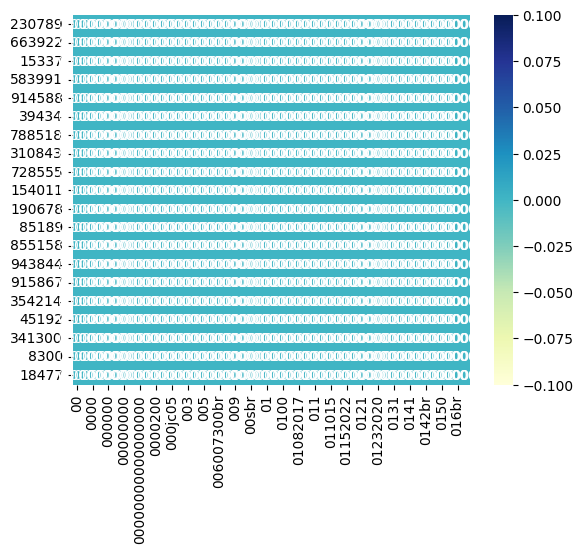

In [35]:
print("Forma de la matriz TF-IDF:", tfidf_matrix.shape)
sns.heatmap(tfidf_df.iloc[:20, :50], annot=True, cmap="YlGnBu", fmt=".3f")
plt.show()

4. Si seguimos teniendo solo valores en cero, inspeccionar con más detalle los datos originales:

Busca problemas como valores faltantes, formatos incorrectos o caracteres especiales que podrían afectar el cálculo de TF-IDF.
Asegurarnos de que el tipo de dato de la columna text_processed, sea string. Si es un tipo de dato diferente, convertirlo, antes de aplicar el vectorizador TF-IDF:


In [36]:
df_super_reducido['text_processed'] = df_super_reducido['text_processed'].astype(str)

Resumen de las acciones:
* Verificar el preprocesamiento: Imprimir reseñas preprocesadas, ajustar stop words y lematización/stemming si es necesario.
* Ajustar el vectorizador: Modificar min_df y max_df en TfidfVectorizer.
* Verificar la forma de la matriz y visualizar una porción más grande: Imprimir tfidf_matrix.shape y visualizar con sns.heatmap una porción más grande de la matriz.
* Inspeccionar los datos originales: Buscar problemas de formato, valores faltantes o tipo de dato incorrecto en la columna text_processed.
Siguiendo estos pasos, podremos diagnosticar la causa del problema de los valores en cero y aplicar la solución adecuada.

2. **Visualizemos las palabras con mayor TF-IDF en todo el dataset, pero solo mostrar las más relevantes**:
* Si queremos analizar todo el dataset, podemos enfocarnos en las palabras con mayor TF-IDF general. Para ello, podríamos calcular el promedio de TF-IDF, de cada palabra en todas las reseñas y mostrar solo las palabras con mayor promedio.

In [37]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Re-download necessary NLTK data if not already present in the environment
# (Assuming this was done successfully earlier in the notebook)
# nltk.download('stopwords')
# nltk.download('wordnet')

# Define stop words and lemmatizer outside the apply function for efficiency
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Re-apply the preprocessing steps to ensure the correct format
# 1. Convert to lowercase
df_super_reducido['text_processed'] = df_super_reducido['text'].astype(str).str.lower()

# 2. Remove punctuation
# Use a more robust way to replace punctuation
translator = str.maketrans('', '', string.punctuation)
df_super_reducido['text_processed'] = df_super_reducido['text_processed'].apply(lambda x: x.translate(translator))

# 3. Eliminar stop words and Tokenization in one step
# Split into words, remove stop words
df_super_reducido['text_processed'] = df_super_reducido['text_processed'].apply(lambda x: [word for word in x.split() if word not in stop_words and word.isalpha()]) # Also ensure word is alphabetic

# 4. Lematización
df_super_reducido['text_processed'] = df_super_reducido['text_processed'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Now, fit the TfidfVectorizer. The 'text_processed' column is correctly a list of tokens.
# Apply ' '.join to convert the list of tokens into a single string for each document
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_super_reducido['text_processed'].apply(' '.join))

# Calculemos el promedio de TF-IDF para cada palabra
average_tfidf = tfidf_matrix.mean(axis=0)

# Obtengamos las palabras con mayor promedio de TF-IDF
feature_names = vectorizer.get_feature_names_out()

# Ensure average_tfidf is a dense array before zipping and sorting
average_tfidf_dense = np.asarray(average_tfidf)[0]

top_words = sorted(zip(feature_names, average_tfidf_dense), key=lambda x: x[1], reverse=True)[:20] # Top 20 palabras

# Print the top words and their TF-IDF scores
print("Top 20 words by average TF-IDF:")
for word, score in top_words:
    print(f"{word}: {score:.4f}")

# ... (you can now add your code to visualize the top_words)

Top 20 words by average TF-IDF:
game: 0.0620
fun: 0.0419
love: 0.0416
great: 0.0373
good: 0.0302
app: 0.0265
like: 0.0250
play: 0.0215
work: 0.0185
get: 0.0179
time: 0.0171
easy: 0.0154
really: 0.0152
use: 0.0143
lot: 0.0120
one: 0.0119
awesome: 0.0118
would: 0.0112
much: 0.0107
dont: 0.0107


3. **Utilizar técnicas de visualización interactivas:**
* Para datasets grandes, las visualizaciones interactivas pueden ser más eficientes. Podríamos utilizar librerías como plotly o bokeh, para crear visualizaciones que permitan explorar los datos de forma más dinámica y eficiente.

**Ejemplo de visualización con Plotly:**

In [38]:
import plotly.express as px

# Crea un DataFrame con las palabras y sus puntajes TF-IDF promedio
tfidf_df = pd.DataFrame(top_words, columns=['word', 'tfidf'])

# Crea un gráfico de barras interactivo
fig = px.bar(tfidf_df, x='word', y='tfidf', title='Top 20 words with highest average TF-IDF')
fig.show()

**Recordemos:**

* Es importante adaptar la técnica de visualización al dataset y a los objetivos de análisis.
* Considereremos la posibilidad de combinar diferentes visualizaciones, para obtener una mejor comprensión de los resultados.
* Documentar las visualizaciones y las interpretaciones de los resultados.

2. **Visualización de Resultados de TF-IDF**:

* **Visualizar palabras por categoría de sentimiento**: Para identificar patrones, podemos visualizar las palabras con mayor TF-IDF, para cada categoría de sentimiento (positivo, negativo, neutral).

In [39]:
# Obtén las reseñas con sentimiento positivo, negativo y neutral
positive_reviews = df_super_reducido[df_super_reducido['sentiment'] > 0]['text_processed']
negative_reviews = df_super_reducido[df_super_reducido['sentiment'] < 0]['text_processed']
neutral_reviews = df_super_reducido[df_super_reducido['sentiment'] == 0]['text_processed']

# Calcula TF-IDF para cada categoría
tfidf_matrix_positive = vectorizer.transform(positive_reviews.apply(' '.join))
tfidf_matrix_negative = vectorizer.transform(negative_reviews.apply(' '.join))
tfidf_matrix_neutral = vectorizer.transform(neutral_reviews.apply(' '.join))

# ... (código para visualizar las palabras con mayor TF-IDF en cada matriz)

In [40]:
# Obtener el vocabulario (lista de palabras indexadas)
feature_names = vectorizer.get_feature_names_out()

# Número de palabras principales a mostrar por reseña
top_n_words = 5

# Iterar sobre cada fila de la matriz TF-IDF (cada reseña)
for i in range(tfidf_matrix.shape[0]):
    # Obtener los índices y valores TF-IDF para la reseña actual
    row = tfidf_matrix.getrow(i)
    indices = row.indices
    data = row.data

    # Crear una lista de pares (índice de palabra, puntaje TF-IDF)
    tfidf_scores = list(zip(indices, data))

    # Ordenar por puntaje TF-IDF de forma descendente
    tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)

    # Obtener las palabras principales y sus puntajes
    top_words_with_scores = [(feature_names[idx], score) for idx, score in tfidf_scores[:top_n_words]]

    # Imprimir las palabras principales para la reseña actual
    print(f"Reseña {i+1}:")
    for word, score in top_words_with_scores:
        print(f"  {word}: {score:.4f}")
    print("-" * 20)

Se han truncado las últimas 5000 líneas del flujo de salida.
  pix: 0.4508
  flip: 0.3879
  putting: 0.3360
  completed: 0.3319
  trouble: 0.2953
--------------------
Reseña 243193:
  product: 0.3014
  cashapp: 0.2805
  tax: 0.2513
  misleading: 0.1844
  deduction: 0.1830
--------------------
Reseña 243194:
  excellent: 1.0000
--------------------
Reseña 243195:
  easy: 0.7197
  use: 0.6943
--------------------
Reseña 243196:
  wise: 0.5902
  addicting: 0.3888
  pretty: 0.3563
  graphic: 0.3461
  better: 0.3171
--------------------
Reseña 243197:
  go: 0.4468
  seem: 0.3110
  slot: 0.3104
  couple: 0.3085
  channel: 0.2936
--------------------
Reseña 243198:
  donebr: 0.5020
  layout: 0.3826
  force: 0.3605
  game: 0.3366
  stop: 0.2852
--------------------
Reseña 243199:
  graphicsbeautiful: 0.7640
  relaxing: 0.3528
  color: 0.3509
  really: 0.2181
  play: 0.1984
--------------------
Reseña 243200:
  news: 0.8207
  app: 0.4072
  great: 0.4009
--------------------
Reseña 243201:
  add

* **Visualizaciones interactivas**: Si el dataset es muy grande, podemos usar visualizaciones interactivas para explorar los resultados de forma más eficiente. Librerías como plotly o bokeh te permiten crear gráficos interactivos.

3. Relación entre Variables:

* **Análisis de correlación**: Utilicemos la función corr() de pandas, para calcular la correlación entre las variables numéricas (review_length_truncated, rating, sentiment).
* **Diagramas de dispersión**: Podemos crear diagramas de dispersión para visualizar la relación entre pares de variables. Podemos colorear los puntos, según el sentimiento para obtener más información.
* **Boxplots**: Utiliemos boxplot, para comparar la distribución de la longitud de la reseña o la calificación en diferentes categorías de sentimiento.

4. **NER (opcional)**

Si queremos explorar NER, podemos usar la librería spaCy, para extraer nombres de productos o compañías de software. Luego, podemos analizar la frecuencia de estas entidades o su relación con otras variables.

In [41]:
!pip install spacy
!python -m spacy download en_core_web_sm

import spacy
import pandas as pd # Ensure pandas is imported if not already

# Load the spacy model
nlp = spacy.load("en_core_web_sm")

# Define the function to extract entities, handling non-string inputs
#def extract_entities(text):
    # Convert input to string, handle potential NaN/None
#    text = str(text) if pd.notna(text) else ""
#    doc = nlp(text)
#    entities = [(ent.text, ent.label_) for ent in doc.ents]
#    return entities

# Apply the function to the 'text' column
#df_super_reducido['entities'] = df_super_reducido['text'].apply(extract_entities)

# Explora las entidades extraídas
#print(df_super_reducido['entities'])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 77.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Se vuelve a trabar el código. Se vé que el dataset o las tareas, son muy pesadas o complejas. Que puedo hacer para mejorar?

Parece que estás experimentando problemas de rendimiento, probablemente porque tu conjunto de datos y las tareas de Procesamiento del Lenguaje Natural, (NLP), que estás realizando son muy pesadas o complejas. Tienes razón al notar que procesar un dataset grande con operaciones como TF-IDF, análisis de sentimiento y reconocimiento de entidades nombradas (NER), puede requerir muchos recursos computacionales.

Aquí te explico qué podría estar causando la lentitud y cómo puedes solucionarlo:

# Hipótesis
La causa principal de que el código se congele o funcione muy lento es probablemente la combinación del tamaño de tu dataset y la naturaleza intensiva en recursos de las operaciones de NLP que estás realizando. Aunque hayas reducido el dataset al 10%, puede que todavía sea demasiado grande para la capacidad de tu entorno actual, especialmente si tienes un número significativo de reseñas y estás realizando tokenización/vectorización complejas.

Algunas operaciones específicas que pueden ser cuellos de botella incluyen:

1. **Vectorización TF-IDF**: Construir la matriz TF-IDF implica procesar todos los documentos y calcular las frecuencias de los términos. Si el tamaño de tu vocabulario es grande, (muchas palabras únicas), la matriz resultante puede ser enorme y consumir mucha memoria.
2. **NER con SpaCy**: El procesamiento nlp() de SpaCy para NER es potente, pero puede ser lento en textos largos o un gran número de documentos, ya que implica varios pasos como tokenización, etiquetado POS, análisis de dependencias y reconocimiento de entidades.
3. **Uso de .apply(**): Usar .apply() en Series grandes de Pandas, (como tus columnas de texto), a veces puede ser menos eficiente que las operaciones vectorizadas, aunque para tareas complejas como NER, a menudo es necesario.
4. **Uso de Memoria**: A medida que procesas los datos, los objetos intermedios, (como la matriz TF-IDF, listas de texto procesado, objetos doc de SpaCy), pueden consumir mucha memoria. Si superas la RAM disponible, el sistema empezará a usar el espacio de intercambio (swap), que es considerablemente más lento.

# Sugerencias de Cambios
Aquí tienes varias estrategias que puedes emplear para mejorar el rendimiento, desde ajustes sencillos hasta cambios más significativos:

1. **Reducir aún más el tamaño del Dataset**: Esta es la forma más directa de reducir la carga de trabajo. Si el 10% sigue siendo demasiado, intenta con el 5% solo para el desarrollo y las pruebas iniciales. Siempre puedes aumentarlo más tarde si el rendimiento lo permite o después de optimizar otras partes.

2. **Optimizar Pipelines de NLP**:
**SpaCy**: Al usar SpaCy, puedes desactivar componentes que no necesitas para una tarea específica para acelerarlo. Solo para NER, es posible que solo necesites 'tok2vec', 'ner' y, potencialmente, 'lemmatizer'.

In [42]:
# Carga el modelo de spacy solo con los componentes necesarios para NER
# Asumiendo que 'tok2vec' y 'ner' son necesarios para el reconocimiento de entidades
nlp = spacy.load("en_core_web_sm", disable=["parser", "tagger", "attribute_ruler"])

  # Tu función extract_entities sigue siendo la misma:
def extract_entities(text):
            text = str(text) if pd.notna(text) else ""
            doc = nlp(text)
            entities = [(ent.text, ent.label_) for ent in doc.ents]
            return entities

        # Aplica la función (inicialmente en el dataset más pequeño)
        # df_super_reducido['entities'] = df_super_reducido['text'].apply(extract_entities)

**Procesamiento por Lotes:** Los modelos de SpaCy suelen ser más eficientes al procesar texto en lotes (`batches`) en lugar de un documento a la vez con `.apply()`. Usa `nlp.pipe()`.

In [43]:
# Usa nlp.pipe para un procesamiento potencialmente más rápido en lotes
    # Define la función para procesar un lote de textos
def process_batch_for_entities(texts):
        # Desactiva los componentes no necesarios para NER dentro de pipe también
        processed_docs = nlp.pipe(texts, disable=["parser", "tagger", "attribute_ruler"], batch_size=50) # Ajusta batch_size (tamaño del lote)

        entities_list = []
        for doc in processed_docs:
            entities = [(ent.text, ent.label_) for ent in doc.ents]
            entities_list.append(entities)
        return entities_list

    # Aplica la función de procesamiento por lotes
    # Esto devuelve una lista, asígnala de nuevo a la columna del DataFrame
    # Asegúrate de aplicar esto a la columna de texto correcta (la columna 'text' original para NER)
    # df_reducido_mini['entities'] = process_batch_for_entities(df_reducido_mini['text'])

3. **Gestión de Memoria**:

* **Procesar en Chunks**: Si no puedes cargar todo el dataset reducido y todos los resultados intermedios en memoria, es posible que necesites procesar el DataFrame en partes, (chunks). Aplica tus pasos de NLP a cada chunk, guarda los resultados, (por ejemplo, en archivos temporales) y luego combínalos. Esto añade complejidad, pero puede hacer que el procesamiento sea factible.
* **Eliminar Variables Innecesarias**: Usa del para eliminar objetos grandes (como DataFrames intermedios o matrices) de la memoria cuando ya no los necesites.
4. **Librerías Alternativas**: Algunas librerías de NLP, están diseñadas para tareas específicas y podrían ser más rápidas o eficientes en memoria para ciertas operaciones que una librería de propósito general, como SpaCy para NER o Scikit-learn, para TF-IDF en datasets muy grandes. Sin embargo, para tu flujo de trabajo actual, optimizar SpaCy y TF-IDF, es probablemente suficiente.

5. **Considerar un Entorno Más Potente**: Si tu máquina local o tu entorno actual en la nube, (como una instancia básica de Colab), tiene recursos limitados, puede que sea necesario actualizar a una máquina más potente o a una instancia de Colab Pro, con más RAM y una mejor CPU/GPU para datasets más grandes.

**Integrando el Procesamiento por Lotes para NER**:

Así es como podrías integrar el enfoque nlp.pipe para NER en tu código existente:

In [44]:
!pip install spacy
!python -m spacy download en_core_web_sm

import spacy
import pandas as pd # Asegúrate de importar pandas si no lo has hecho

# Carga el modelo de spacy, desactivando los componentes no necesarios para NER
# Los componentes comunes necesarios para NER son 'tok2vec' y 'ner'.
# La lista exacta de componentes a desactivar puede variar ligeramente según el modelo.
# Puedes inspeccionar nlp.pipe_names después de cargar para ver los componentes disponibles.
nlp = spacy.load("en_core_web_sm", disable=["parser", "tagger", "attribute_ruler", "lemmatizer"]) # Añadido lemmatizer si no es necesario específicamente para NER

# Define la función para procesar textos en lotes usando nlp.pipe
def process_batch_for_entities(texts, batch_size=50):
    """Procesa textos en lotes para extraer entidades usando SpaCy."""
    # Asegúrate de que texts sea un iterable de strings
    # Maneja posibles valores que no sean string/NaN antes de pasarlos a nlp.pipe
    processed_texts = [str(t) if pd.notna(t) else "" for t in texts]

    # Usa nlp.pipe para un procesamiento eficiente por lotes
    # Desactiva los componentes de nuevo dentro de la llamada a pipe por seguridad
    processed_docs = nlp.pipe(processed_texts, disable=["parser", "tagger", "attribute_ruler", "lemmatizer"], batch_size=batch_size)

    entities_list = []
    for doc in processed_docs:
        # Extrae entidades de cada documento procesado
        entities = [(ent.text, ent.label_) for ent in doc.ents]
        entities_list.append(entities)
    return entities_list

# --- Asegúrate de que df_super_reducido esté definido antes de este punto ---
# Ejemplo: Cárgalo desde tu Drive si es necesario
# from google.colab import drive
# drive.mount('/content/drive')
# file_path = '/content/drive/My Drive/CODERHOUSE/DATA SCIENCE III COMISIÓN 61715/df_super_reducido.csv'
# df_super_reducido = pd.read_csv(file_path)
# ---------------------------------------------------------------------

# Aplica la función de procesamiento por lotes a la columna 'text' original
# Usa la muestra más pequeña (df_super_reducido) si la creaste para probar
# Para datasets más grandes, puede que necesites procesar df_super_reducido en partes más pequeñas manualmente
df_super_reducido['entities'] = process_batch_for_entities(df_super_reducido['text'], batch_size=100) # Ajusta el tamaño del lote (batch_size)

# Explora las entidades extraídas
print(df_super_reducido['entities'])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 28.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
689617                                      [(hours, TIME)]
566392                           [(the Candy Crushes, ORG)]
736758                                                   []
452753                                                   []
529837                                                   []
                                ...                        
586752                                                   []
783721                                                   []
18634                                                    []
270897    [(Law & Order Criminal Intent, OR

Comienza por reducir el tamaño del dataset, para iterar más rápido durante el desarrollo.

Luego, implementa el procesamiento por lotes para SpaCy.

Si el rendimiento sigue siendo un problema, es posible que necesites explorar el procesamiento de los datos en "chunks" o considerar un entorno de cómputo más potente.



---



Ahora. Mi objetivo es verificar si la parte de NLP es suficiente para cumplir con el requisito mínimo y luego enfocarme en Deep Learning, para la profundización.

Basado en la consigna y el código que he compartido, **sí, parece que ya he cubierto el requisito mínimo de NLP**. Hemos trabajado con un dataset de texto, (reseñas de software) y hemos realizado varias tareas de preprocesamiento, (convertir a minúsculas, eliminar puntuación, eliminar stop words, tokenización, lematización). Además, hemos realizado análisis de texto como nube de palabras, análisis de sentimiento y TF-IDF, lo cual va más allá del mínimo de solo preprocesamiento.

Por lo tanto, podemos considerar que la parte de NLP, cumple con el "mínimo requerido respecto a NLP", mencionado en la consigna.



---



Ahora, para la Entrega Final, podemos elegir la actividad de Deep Learning y profundizar en ella.

Esto implica:

1. **Construir la primera red neuronal sencilla**:

Este sería el primer paso en Deep Learning. Podríamos usar los datos de reseñas preprocesadas, para una tarea de clasificación, (por ejemplo, clasificar las reseñas como positivas o negativas basándonos en la polaridad del sentimiento o directamente intentar predecir la calificación).
2. **Profundizar en la red neuronal**: Una vez que tengas la red sencilla, la profundización sería mejorarla mediante la adición de capas, experimentando con hiperparámetros, etc., como se mencionó en la consigna.
**En resumen**:

* **La parte de NLP está lista como requisito mínimo.**
* **Podemos enfocar los esfuerzos restantes en la parte de Deep Learning, para la profundización**.



---



Dado que tenemos un dataset de reseñas de software y hemos realizado preprocesamiento de texto, una tarea común de Deep Learning en este contexto, es la **clasificación de texto**, por ejemplo, para predecir la calificación o el sentimiento de una reseña.

Para ayudar con el modelo de Deep Learning en Colab, daremos los pasos para construir un modelo de clasificación simple utilizando Keras, (una API de alto nivel para construir redes neuronales, integrada en TensorFlow, que es muy común en Colab).

Se asume que queremos realizar una clasificación de sentimiento simple, (positivo/negativo), basándonos en el análisis de sentimiento previo, o alternativamente, clasificar las reseñas por calificación, (1 a 5 estrellas). La clasificación por calificación, es un poco más compleja (multiclase), que la clasificación binaria de sentimiento (positivo/negativo), pero podemos adaptar el modelo.

Vamos a empezar con una clasificación binaria de sentimiento para simplificar, asumiendo que ya tenemos una columna de sentimiento, que podemos binarizar (por ejemplo, sentimiento > 0 para positivo, <= 0 para negativo).

**Pasos para construir un modelo de clasificación de texto con Deep Learning en Colab:**

1. **Preparar los datos para el modelo**:
* Necesitemos tener nuestros textos preprocesados y las etiquetas (positivo/negativo).
* Convertir el texto en secuencias numéricas que la red neuronal pueda entender. Para esto, usaremos un Tokenizer.
* Asegurar que todas las secuencias tengan la misma longitud (padding).
* Dividir los datos en conjuntos de entrenamiento y prueba.

2. **Construir la red neuronal**:
* Definir la arquitectura del modelo, (capas de embedding, capas densas, etc.).
* Compilar el modelo, (definir la función de pérdida, el optimizador, las métricas).

3. **Entrenar el modelo**:
* Entrenar el modelo con los datos de entrenamiento.

4. **Evaluar el modelo**:
* Evaluar el rendimiento del modelo en los datos de prueba.
Aquí tenemoss el código para realizar estos pasos:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4881/4881 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.8835 - loss: 0.2712 - val_accuracy: 0.9604 - val_loss: 0.1101
Epoch 2/10
4881/4881 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9662 - loss: 0.0917 - val_accuracy: 0.9653 - val_loss: 0.1008
Epoch 3/10
4881/4881 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 0.9769 - loss: 0.0666 - val_accuracy: 0.9663 - val_loss: 0.1005
Epoch 4/10
4881/4881 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.9853 - loss: 0.0458 - val_accuracy: 0.9674 - val_loss: 0.1070
Epoch 5/10
4881/4881 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9901 - loss: 0.0334 - val_accuracy: 0.9649 - val_loss: 0.1259
Epoch 6/10
4881/4881 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9923 - loss: 0.0259 - val_accuracy: 0.9616 - val_loss: 0.1414
Epoch 7/10
4881/4881 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9947 - loss: 0.0199 - val_accuracy: 0.9620 - val_loss: 0.1658
Epoch 8/10
4881/4881 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.9958 - loss: 0

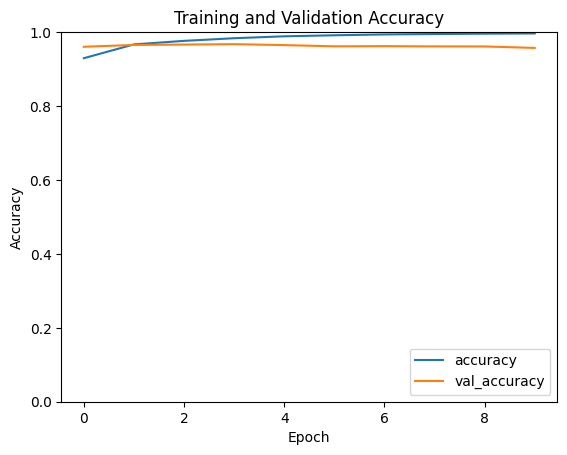

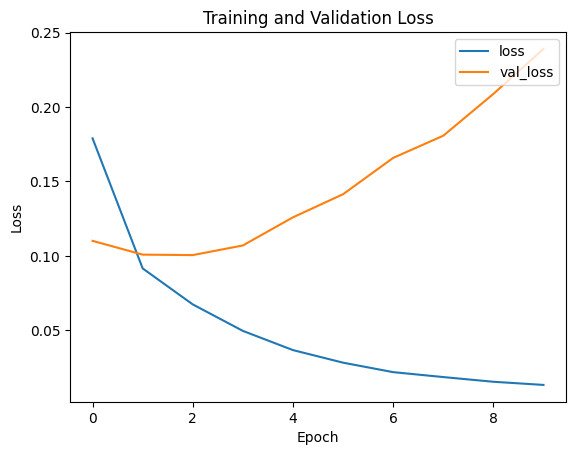

In [45]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from sklearn.model_selection import train_test_split # Import train_test_split

# Suponiendo que ya tienes tu DataFrame o con la columna 'text_processed'
# y una columna de etiquetas binarias llamada 'sentiment_label' (0 para negativo, 1 para positivo)
# Si no tienes 'sentiment_label', puedes crearla basándote en tu columna 'sentiment'
# Por ejemplo:
# df_super_reducido['sentiment_label'] = df_super_reducido['sentiment'].apply(lambda x: 1 if x > 0 else 0)
# Asegúrate de ajustar esto según cómo definas tus clases (ej. positivo/negativo o rangos de calificación)

# FIX: Create the 'sentiment_label' column if it does not exist.
# Assuming sentiment > 0 is positive (1) and sentiment <= 0 is negative (0).
if 'sentiment_label' not in df_reducido.columns:
    df_super_reducido['sentiment_label'] = df_super_reducido['sentiment'].apply(lambda x: 1 if x > 0 else 0)


# 1. Preparar los datos para el modelo

# Convertir las listas de tokens a strings para el Tokenizer
texts = [' '.join(review) for review in df_super_reducido['text_processed']]
labels = df_super_reducido['sentiment_label'].values # Tus etiquetas binarias

# Configurar el Tokenizer
# num_words: el número máximo de palabras a considerar (ajusta según tu vocabulario)
# oov_token: para manejar palabras fuera del vocabulario
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

# Convertir texto a secuencias de números
sequences = tokenizer.texts_to_sequences(texts)

# Padding para uniformar la longitud de las secuencias
# maxlen: longitud máxima de las secuencias (ajusta según la longitud típica de tus reseñas preprocesadas)
# Puedes observar la distribución de review_length_truncated para definir un valor apropiado.
maxlen = 100 # Ejemplo, ajusta según tus datos

padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')

# Dividir los datos en conjuntos de entrenamiento y prueba
# Puedes usar sklearn.model_selection.train_test_split para una división aleatoria


X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# 2. Construir la red neuronal

# Definir las dimensiones del embedding
# embedding_dim: el tamaño del vector de embedding para cada palabra
embedding_dim = 16

model = Sequential([
    # Capa de Embedding: mapea cada índice de palabra a un vector denso
    # input_dim: tamaño del vocabulario + 1 (por el 0 reservado)
    # output_dim: dimensión del embedding
    # input_length: longitud de las secuencias de entrada
    Embedding(input_dim=5000 + 1, output_dim=embedding_dim, input_length=maxlen),

    # Capa Flatten: aplana la salida de la capa de embedding para las capas densas
    Flatten(),

    # Capa Densa: capa completamente conectada
    # units: número de neuronas en la capa
    # activation: función de activación (relu es común para capas ocultas)
    Dense(units=32, activation='relu'),

    # Capa de Salida: para clasificación binaria, una neurona con activación sigmoide
    # activation: sigmoide para clasificación binaria (salida entre 0 y 1)
    Dense(units=1, activation='sigmoid')
])

# Compilar el modelo
# optimizer: algoritmo para actualizar los pesos de la red (adam es una opción popular)
# loss: función de pérdida (binary_crossentropy para clasificación binaria)
# metrics: métricas para evaluar el rendimiento (accuracy es común)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo para ver la arquitectura
model.summary()

# 3. Entrenar el modelo

# epochs: número de veces que el modelo verá todo el conjunto de entrenamiento
# batch_size: número de muestras por actualización de gradiente
epochs = 10
batch_size = 32

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2) # Usar una parte del conjunto de entrenamiento para validación

# 4. Evaluar el modelo

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss en el conjunto de prueba: {loss:.4f}")
print(f"Precisión en el conjunto de prueba: {accuracy:.4f}")

# Para visualizar el rendimiento del entrenamiento
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Explicación del código:**

* **Importaciones**: Importamos las librerías necesarias de TensorFlow, Keras y Scikit-learn.
* **Preparación de datos**:
* Se asume que ya tenemos el texto preprocesado en df_reducido['text_processed'] y las etiquetas binarias, en df_reducido['sentiment_label']. Debemos asegurarnos de tener esta columna de etiquetas.
* Tokenizer: Creamos un vocabulario a partir de las reseñas y convierte cada palabra en un índice numérico. Las reseñas se convierten en secuencias de estos índices.
* pad_sequences: Las redes neuronales típicamente requieren entradas de longitud fija. Esta función añade "padding" (ceros) al inicio o final de las secuencias más cortas y trunca las más largas para que todas tengan la misma longitud (maxlen).
train_test_split: Divide tus datos en conjuntos para entrenamiento y prueba.

* **Construcción del modelo (Sequential**): Define un modelo secuencial (las capas se apilan una tras otra).
* Embedding: Esta es la capa de entrada para datos de texto. Convierte los índices de palabras en vectores densos de embedding_dim dimensiones. Estas incrustaciones (embeddings) se aprenden durante el entrenamiento y capturan relaciones semánticas entre las palabras.
* Flatten: Transforma la salida 3D de la capa de embedding (batch_size, maxlen, embedding_dim) a 2D (batch_size, maxlen * embedding_dim) para ser compatible con las capas densas.
* Dense: Estas son capas neuronales estándar. La primera tiene 32 neuronas y usa la función de activación ReLU.
* La capa de salida tiene 1 neurona con activación sigmoide, adecuada para clasificación binaria, (la salida es una probabilidad entre 0 y 1).

**Compilación del modelo (compile)**: Configura cómo se entrenará el modelo.
* optimizer: Adam es un optimizador eficiente.
* loss: binary_crossentropy es la función de pérdida estándar para clasificación binaria.
* metrics: Se usará la precisión (accuracy) para evaluar el modelo durante el entrenamiento y la evaluación.

**Entrenamiento del modelo (fit):** El modelo aprende de los datos de entrenamiento durante un número especificado de épocas (epochs). validation_split reserva una parte de los datos de entrenamiento para monitorear el rendimiento durante el entrenamiento y detectar posible sobreajuste.

**Evaluación del modelo (evaluate)**: Se mide el rendimiento del modelo en datos que no ha visto durante el entrenamiento (X_test, y_test).
**Visualización:** Se grafican la precisión y la pérdida de entrenamiento y validación a lo largo de las épocas para visualizar el proceso de aprendizaje.
**Para adaptar a clasificación multiclase (predicción de calificación 1-5)**:

* Tu columna de etiquetas (labels) no sería binaria, sino numérica (1, 2, 3, 4, 5).
* Deberías considerar si tratar las calificaciones como categorías discretas (clasificación) o como un valor continuo (regresión). Para este tipo de problema, la clasificación multiclase es más común.

**Si es clasificación multiclase:**
* Tus etiquetas (y_train, y_test) deberán estar en formato "one-hot encoded". Si tienes 5 clases, una etiqueta '3' se convertiría en un vector [0, 0, 1, 0, 0]. Puedes usar tf.keras.utils.to_categorical.
* La capa de salida (Dense) debería tener units igual al número de clases (ej. 5).
* La función de activación de la capa de salida debería ser softmax (para obtener probabilidades para cada clase).
* La función de pérdida (loss) debería ser categorical_crossentropy.

**Ajustes en el modelo**: El resto de la arquitectura (Embedding, Flatten, capas Dense ocultas) podría ser similar, aunque podrías querer experimentar con más capas o neuronas.

**Próximos pasos y cómo profundizar (para la entrega final):**

**Experimenta con los hiperparámetros**:
* Número de palabras en el vocabulario (num_words en Tokenizer).
* Longitud máxima de las secuencias (maxlen en pad_sequences).
* Dimensión del embedding (embedding_dim).
* Número de neuronas en las capas densas.
* Número de capas densas adicionales.
* Función de activación en las capas ocultas (ReLU, LeakyReLU, etc.).
* Optimizador (Adam, SGD, RMSprop).
* Tasa de aprendizaje del optimizador.
* Número de épocas (epochs).
* Tamaño del batch (batch_size).

* **Añadir capas adicionales**: Puedes agregar más capas Dense entre la capa Flatten y la capa de salida.
* **Considerar otros tipos de capas**: Para datos secuenciales como texto, a menudo se utilizan capas recurrentes (como LSTM o GRU) o convolucionales (Conv1D) antes de las capas Dense. Esto es una mejora significativa sobre el modelo simple Flatten y podría ser parte de tu profundización. Si quieres explorar esto, te puedo proporcionar el código para un modelo con LSTM, por ejemplo.
* **Regularización**: Para evitar el sobreajuste, puedes añadir capas Dropout entre las capas densas.
* **Evaluación más allá de la precisión**: Considera métricas como precisión, recall, F1-score (especialmente si las clases están desbalanceadas) o la matriz de confusión.



---



# Profundización en el Análisis de Sentimiento
Ya tenemos la columna 'sentiment' (polaridad del sentimiento) y 'rating'. Vamos a visualizar la relación entre ellas y calcular la correlación.

Relación entre Sentimiento y Calificación (rating)
Usaremos un diagrama de dispersión nuevamente, pero esta vez, para visualizar la relación entre la polaridad del sentimiento (sentiment) y la calificación (rating).

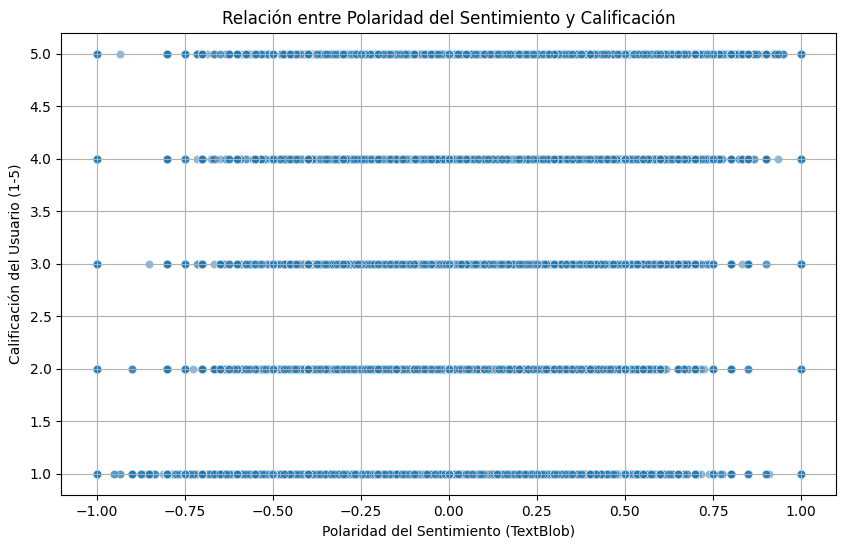


Coeficiente de correlación entre Sentimiento y Calificación: 0.3698


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Asegurarse de tener pandas importado si no está

# Asegurarse de que las columnas existen
if 'sentiment' in df_super_reducido.columns and 'rating' in df_super_reducido.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_super_reducido, x='sentiment', y='rating', alpha=0.5) # alpha para ver la densidad de puntos
    plt.xlabel('Polaridad del Sentimiento (TextBlob)')
    plt.ylabel('Calificación del Usuario (1-5)')
    plt.title('Relación entre Polaridad del Sentimiento y Calificación')
    plt.grid(True)
    plt.show()
else:
    print("Las columnas 'sentiment' o 'rating' no se encuentran en el DataFrame.")

# Calcular el coeficiente de correlación
if 'sentiment' in df_super_reducido.columns and 'rating' in df_super_reducido.columns:
    correlation = df_super_reducido['sentiment'].corr(df_super_reducido['rating'])
    print(f"\nCoeficiente de correlación entre Sentimiento y Calificación: {correlation:.4f}")
else:
     print("\nNo se puede calcular la correlación. Las columnas 'sentiment' o 'rating' no se encuentran.")

**Explicación**:

1. Importamos matplotlib.pyplot y seaborn para graficar, y pandas por si acaso.
2. Usamos sns.scatterplot para crear el diagrama de dispersión. El eje X es la polaridad del sentimiento (generalmente entre -1 y 1, donde 1 es muy positivo y -1 muy negativo), y el eje Y es la calificación (1 a 5).
3.Añadimos alpha=0.5 para que los puntos sean semi-transparentes, lo que ayuda a visualizar las áreas donde hay una mayor concentración de reseñas.
4. Agregamos etiquetas, título y una cuadrícula para mejorar la legibilidad.
5. Calculamos el coeficiente de correlación de Pearson, entre ambas columnas usando .corr(). Este valor nos dará una medida numérica de la fuerza y dirección de la relación lineal, (un valor cercano a 1 indica una fuerte correlación positiva, cercano a -1 una fuerte correlación negativa, y cercano a 0 poca o ninguna correlación lineal).
**Interpretación del resultado**:

* **Diagrama de Dispersión**: Observemos cómo se distribuyen los puntos. ¿Tienden las reseñas con alta polaridad de sentimiento a tener calificaciones altas? ¿Y las de baja polaridad a tener calificaciones bajas? Deberíamos ver una tendencia general que confirma si nuestro análisis de sentimiento, se alinea con la calificación numérica de los usuarios.
* **Coeficiente de Correlación**: Un valor positivo significativo (cercano a 1) indicará que, en general, a mayor polaridad positiva en el texto, mayor es la calificación. Un valor negativo indicaría lo contrario. La magnitud (qué tan cerca está de 1 o -1) indica qué tan fuerte es esta relación lineal.

Este análisis es clave para validar si nuestro modelo de sentimiento, (TextBlob en este caso), está capturando lo que los usuarios expresan con sus calificaciones numéricas.

Ahora. Quiero que pasemos a explorar la diferencia de sentimiento entre las reseñas de compradores verificados vs. no verificados.
Esto puede ser muy interesante, para ver si hay una diferencia en cómo se expresan o si los verificados tienden a ser más (o menos) positivos/negativos.

La columna relevante para esto es 'verified_purchase', que es booleana (True o False).

Podemos visualizar esta diferencia usando boxplots o histogramas separados, y también calcular las estadísticas descriptivas del sentimient,o para cada grupo.

# Diferencia de Sentimiento: Compras Verificadas vs. No Verificadas

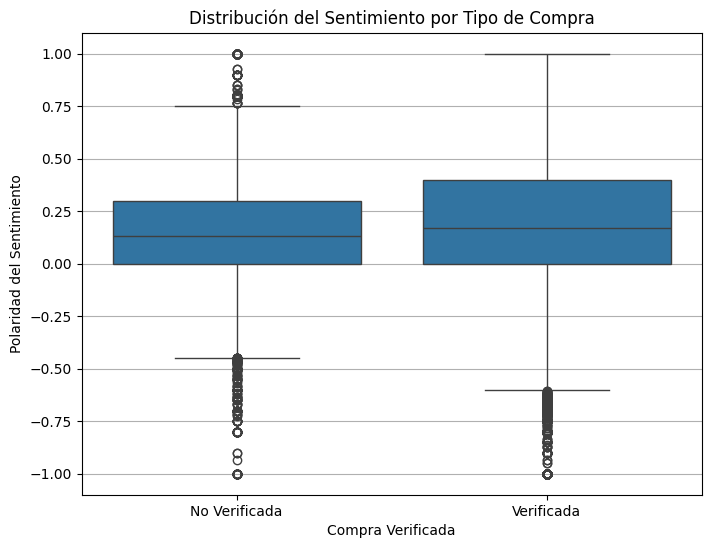

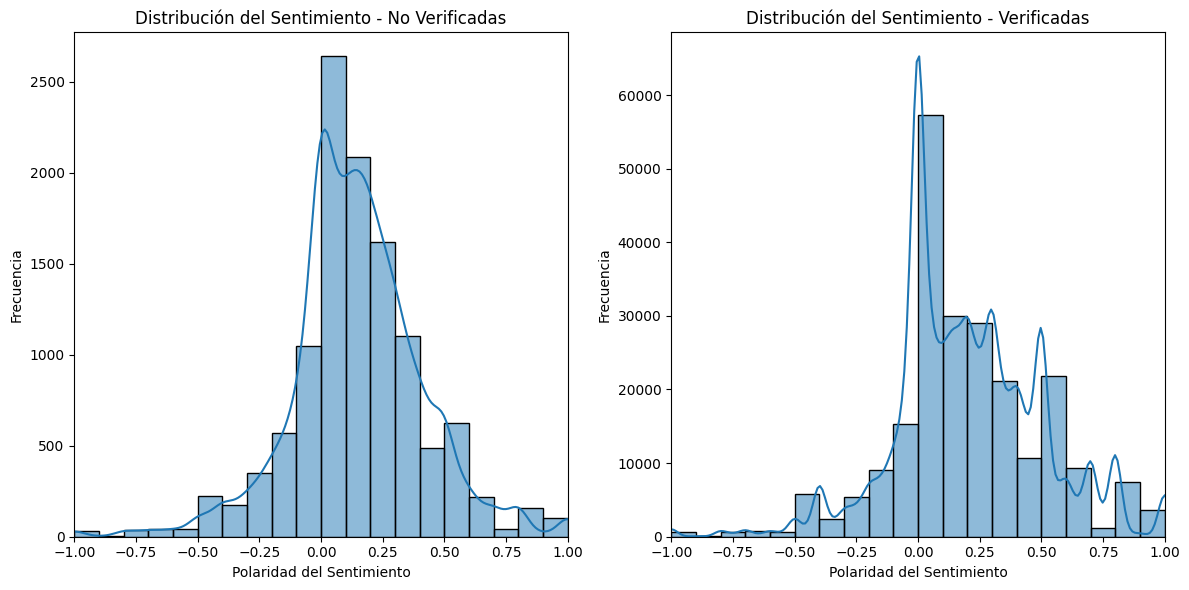


Estadísticas Descriptivas del Sentimiento por Tipo de Compra:
                      count      mean       std  min  25%       50%  75%  max
verified_purchase                                                            
False               11608.0  0.145691  0.268789 -1.0  0.0  0.133333  0.3  1.0
True               232401.0  0.197611  0.305017 -1.0  0.0  0.170707  0.4  1.0


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Asegurarse de tener pandas importado

# Asegurarse de que las columnas existen y 'sentiment' no es None
if 'sentiment' in df_super_reducido.columns and 'verified_purchase' in df_super_reducido.columns:

    # Visualización usando Boxplot
    plt.figure(figsize=(8, 6))
    # Asegurarse de que la columna 'sentiment' no contenga valores None antes de graficar
    sns.boxplot(data=df_super_reducido.dropna(subset=['sentiment']), x='verified_purchase', y='sentiment')
    plt.xlabel('Compra Verificada')
    plt.ylabel('Polaridad del Sentimiento')
    plt.title('Distribución del Sentimiento por Tipo de Compra')
    plt.xticks([0, 1], ['No Verificada', 'Verificada']) # Cambiar etiquetas si True/False se mapea a 1/0
    plt.grid(axis='y')
    plt.show()

    # Visualización usando Histogramas separados
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1) # 1 fila, 2 columnas, primer gráfico
    sns.histplot(data=df_super_reducido[df_super_reducido['verified_purchase'] == False].dropna(subset=['sentiment']), x='sentiment', bins=20, kde=True)
    plt.title('Distribución del Sentimiento - No Verificadas')
    plt.xlabel('Polaridad del Sentimiento')
    plt.ylabel('Frecuencia')
    plt.xlim([-1, 1]) # Limitar el eje X para consistencia

    plt.subplot(1, 2, 2) # 1 fila, 2 columnas, segundo gráfico
    sns.histplot(data=df_super_reducido[df_super_reducido['verified_purchase'] == True].dropna(subset=['sentiment']), x='sentiment', bins=20, kde=True)
    plt.title('Distribución del Sentimiento - Verificadas')
    plt.xlabel('Polaridad del Sentimiento')
    plt.ylabel('Frecuencia')
    plt.xlim([-1, 1]) # Limitar el eje X para consistencia

    plt.tight_layout() # Ajustar el layout para evitar superposiciones
    plt.show()

    # Estadísticas Descriptivas por Grupo
    print("\nEstadísticas Descriptivas del Sentimiento por Tipo de Compra:")
    print(df_super_reducido.dropna(subset=['sentiment']).groupby('verified_purchase')['sentiment'].describe())

else:
    print("Las columnas 'sentiment' o 'verified_purchase' no se encuentran en el DataFrame.")

**Explicación**:

1. Importamos las librerías necesarias.
2. Utilizamos seaborn.boxplot, para mostrar la distribución del sentimiento, (mediana, cuartiles, rango intercuartílico, posibles outliers) para las reseñas verificadas (True) y no verificadas (False).
3. Creamos dos histogramas separados usando seaborn.histplot, para visualizar la forma de la distribución del sentimiento para cada grupo. Esto complementa el boxplot mostrando la frecuencia de cada rango de sentimiento.
4. Usamos .dropna(subset=['sentiment']), en los gráficos y en las estadísticas descriptivas. Esto es una buena práctica si hubiera reseñas donde el cálculo del sentimiento falló y resultó en NaN o None, aunque en este caso TextBlob, suele devolver 0 para textos vacíos o nulos.
Previene posibles errores si hubiera otros problemas.
5. Finalmente, usamos df_reducido.groupby,('verified_purchase')['sentiment'].describe(), para obtener estadísticas como la media, la desviación estándar, el mínimo, el máximo y los cuartiles para el sentimiento en cada uno de los dos grupos.
**Interpretación de los resultados**:

**Boxplot**: Comparemos la caja, (que representa el 50% central de los datos) y la línea mediana de ambos grupos. ¿Es la mediana del sentimiento más alta para los verificados o los no verificados? ¿Es la dispersión (el tamaño de la caja) similar? Los "bigotes" y los puntos individuales muestran el rango completo y los posibles outliers.

**Histogramas**: Comparemos las formas de las distribuciones. ¿Ambos grupos tienen distribuciones similares, (por ejemplo, sesgadas hacia positivo) o hay diferencias notables? ¿Hay un pico más pronunciado en positivo para un grupo?

**Estadísticas Descriptivas**: Veamos la media y la mediana del sentimiento para cada grupo. ¿Son muy diferentes? La desviación estándar nos indica la dispersión, dentro de cada grupo.

Este análisis nos ayudará a determinar si el hecho de que una compra esté verificada, tiene una influencia notable en el sentimiento expresado en la reseña. A menudo se espera que las reseñas verificadas sean más "genuinas" o quizás reflejen una experiencia más completa con el producto.



---



# Podemos avanzar con el Deep Learning

 Basándonos en el trabajo que hemos realizado hasta ahora en el notebook, podemos avanzar con Deep Learning para una red neuronal sencilla. Hemos completado pasos cruciales, como el preprocesamiento del texto, (tokenización, eliminación de stop words, lematización) y la vectorización con TF-IDF, que son fundamentales para preparar los datos textuales, para un modelo de Deep Learning.

Aquí presento los pasos que podríamos seguir para construir una red neuronal sencilla de 2 a 4 capas en Colab:

1. **Preparar los datos para la red neuronal**:

* Necesitaremos las características, (la matriz TF-IDF que hemos creado) y las etiquetas (la columna rating o, si decidimos abordarlo como un problema de clasificación binaria, podríamos crear una etiqueta de sentimiento basada en la polaridad calculada).
* Dividir los datos en conjuntos de entrenamiento y prueba. Esto es crucial para evaluar el rendimiento de nuestro modelo en datos no vistos.
* Aseguremosnos de que nuestras etiquetas, estén en el formato correcto, para el tipo de problema que queremos resolver, (por ejemplo, para clasificación, podrían necesitar ser one-hot encoded).
2. **Construir la red neuronal con TensorFlow/Keras**:

* Importemos las librerías necesarias de TensorFlow y Keras.
* Definamos el modelo secuencial.
* Añadir capas densas (Dense) a nuestro modelo. Podemos empezar con 2 o 3 capas ocultas, con funciones de activación como ReLU. La capa de salida dependerá de si estamos haciendo clasificación o regresión.
* Definamos la función de pérdida y el optimizador.
3. **Entrenar el modelo**:

* Compilemos el modelo.
* Entrenemos el modelo, utilizando nuestros datos de entrenamiento. Especifiquemos el número de epochs y el tamaño del lote.
4. **Evaluar el modelo**:

* Evaluemos el rendimiento del modelo en nuestro conjunto de prueba, utilizando métricas apropiadas, (por ejemplo, precisión, F1-score para clasificación; Mean Squared Error para regresión).
Aquí tenemos un ejemplo de código básico en Python, utilizando Keras para clasificar reseñas en positivas/negativas, (asumiendo que ya tenemos la columna sentiment y podemos clasificarla):

In [48]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Suponiendo que df_super_reducido ya existe y tiene 'sentiment' y 'tfidf_matrix'
# Vamos a crear una etiqueta binaria simple basada en el sentimiento
df_super_reducido['sentiment_label'] = df_super_reducido['sentiment'].apply(lambda x: 1 if x > 0 else 0) # 1 para positivo, 0 para negativo/neutral

X = tfidf_matrix # Tus características TF-IDF
y = df_super_reducido['sentiment_label'].values # Tus etiquetas binarias

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir el modelo de red neuronal
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5), # Capa de Dropout para regularización
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') # Capa de salida para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Mostrar un resumen del modelo
model.summary()

# Entrenar el modelo
history = model.fit(X_train, y_train,
                    epochs=10, # Puedes ajustar el número de épocas
                    batch_size=32, # Puedes ajustar el tamaño del lote
                    validation_split=0.2, # Usar una parte de los datos de entrenamiento para validación
                    verbose=1)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión en el conjunto de prueba: {accuracy:.4f}")

# Si quieres hacer predicciones
# predictions = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │     9,972,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,980,673 (38.07 MB)

 Trainable params: 9,980,673 (38.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4881/4881 ━━━━━━━━━━━━━━━━━━━━ 976s 199ms/step - accuracy: 0.8900 - loss: 0.2483 - val_accuracy: 0.9578 - val_loss: 0.1049
Epoch 2/10
4881/4881 ━━━━━━━━━━━━━━━━━━━━ 894s 183ms/step - accuracy: 0.9731 - loss: 0.0742 - val_accuracy: 0.9636 - val_loss: 0.0974
Epoch 3/10
4881/4881 ━━━━━━━━━━━━━━━━━━━━ 875s 179ms/step - accuracy: 0.9837 - loss: 0.0451 - val_accuracy: 0.9639 - val_loss: 0.1032
Epoch 4/10
4881/4881 ━━━━━━━━━━━━━━━━━━━━ 937s 182ms/step - accuracy: 0.9887 - loss: 0.0313 - val_accuracy: 0.9635 - val_loss: 0.1103
Epoch 5/10
4881/4881 ━━━━━━━━━━━━━━━━━━━━ 881s 180ms/step - accuracy: 0.9921 - loss: 0.0226 - val_accuracy: 0.9618 - val_loss: 0.1261
Epoch 6/10
4881/4881 ━━━━━━━━━━━━━━━━━━━━ 892s 183ms/step - accuracy: 0.9946 - loss: 0.0159 - val_accuracy: 0.9601 - val_loss: 0.1397
Epoch 7/10
4881/4881 ━━━━━━━━━━━━━━━━━━━━ 911s 181ms/step - accuracy: 0.9950 - loss: 0.0147 - val_accuracy: 0.9617 - val_loss: 0.1490
Epoch 8/10
4881/4881 ━━━━━━━━━━━━━━━━━━━━ 893s 183ms/step - ac

Consideraciones importantes:

* Tipo de problema: Decidamos si queremos abordar la tarea como una clasificación, (por ejemplo, sentimiento positivo/negativo) o una regresión (predecir la calificación exacta). Esto afectará la última capa de la red neuronal y la función de pérdida.
* Complejidad del modelo: Comencemos con una red sencilla y aumentemos la complejidad gradualmente si es necesario.
* Hiperparámetros: El número de capas, el número de neuronas por capa, la función de activación, la tasa de aprendizaje del optimizador y el número de épocas son hiperparámetros que pueden ajustarse para mejorar el rendimiento.
* Manejo de datos grandes: Si nuestro dataset df_reducido sigue siendo grande, el entrenamiento puede llevar tiempo. Consideremos usar un GPU, si es posible en Colab.

La información y código desarrollado, ya es para deep learning. Qué es recomendable hacer? Clasificación o Regresión?

La información y el código desarrollados, son un excelente punto de partida para Deep Learning. Dado el contexto del proyecto de análisis de reseñas de software, donde tenemos la calificación, (rating) y el sentimiento (sentiment), **recomiendo comenzar con un problema de clasificación**.

**¿Por qué clasificación?**

1. Naturalidad para el problema: Las reseñas con sus calificaciones (1 a 5 estrellas) o el sentimiento calculado, (positivo/negativo/neutral) se ajustan muy bien a un problema de clasificación. Podemos clasificar las reseñas en categorías como:
* Positivas vs. Negativas, (clasificación binaria, usando la columna sentiment o creando una basada en rating)
* Clasificación multi-clase si queremos predecir las 5 posibles calificaciones.
2. Mayor interpretabilidad inicial: Para empezar, la clasificación puede ser más fácil de interpretar que la regresión. Podemos ver si nuestro modelo predice correctamente, si una reseña es positiva o negativa, por ejemplo.
3. Métricas claras: Existen métricas de evaluación bien definidas y fáciles de entender para problemas de clasificación, (precisión, recall, F1-score, matriz de confusión).
4. Punto de partida sólido para NLP: La clasificación de texto es una tarea fundamental en el procesamiento del lenguaje natural y es un buen primer paso para aplicar Deep Learning en este dominio.
**Opciones de clasificación:**

* Clasificación Binaria: Podemos simplificar el problema y clasificar las reseñas en dos categorías principales: positivas y negativas. Podríamos definir "positivas" como reseñas con calificación 4 o 5, y "negativas" como 1 o 2 (excluyendo las neutrales, o definiendo umbrales basados en la columna sentiment). Esta es una excelente opción para empezar, ya que es más sencilla de modelar.
* Clasificación Multi-clase: Si queremos predecir las 5 calificaciones originales, sería un problema de clasificación multi-clase. Esto es más complejo que la clasificación binaria, pero te da una predicción más granular.
Mi recomendación:

Empieza con la clasificación binaria utilizando la columna sentiment_label, que creamos, (1 para positivo, 0 para negativo/neutral). El código que proporcionado, ya está configurado para esto, con una capa de salida con activación sigmoid y binary_crossentropy como función de pérdida.

Una vez que tengamos un modelo funcionando para la clasificación binaria, podremos considerar expandirnos a un problema de clasificación multi-clase.

Clasificación es un excelente siguiente paso para nuestro proyecto y nos permitirá utilizar el preprocesamiento y la vectorización TF-IDF que ya hemos realizado de manera efectiva.

Basado en lo aprendido y por cuestiones de tiempo, le consulto a Gemini, sobre el paso recomendado, para crear una Red Neuronal Sencilla. Me Recomienda Clasificación Binaria.

Estamos en el punto de definir el umbral para nuestra clasificación binaria, donde las calificaciones 4 y 5 serán consideradas positivas y las calificaciones 0, 1, 2, y 3 serán consideradas negativas.

Vamos a proceder con la creación del código para implementar esto y luego explicar los pasos.

**Paso 1: Definir el Umbral y Crear la Columna Binaria**

Este es el código para crear la nueva columna, que representará nuestra variable objetivo, para la clasificación binaria:

In [49]:
import pandas as pd

# Asegúrate de que df_super_reducido esté cargado.
# Si estás retomando la sesión, puedes cargarlo desde Google Drive:
# from google.colab import drive
# drive.mount('/content/drive')
# file_path_super_reducido = '/content/drive/My Drive/CODERHOUSE/DATA SCIENCE III COMISIÓN 61715/df_super_reducido.csv'
# df_super_reducido = pd.read_csv(file_path_super_reducido)

# Define el umbral para las calificaciones positivas
# Las calificaciones 4 y 5 serán consideradas positivas (representadas por 1)
positive_threshold = 4

# Crea una nueva columna binaria 'sentiment_binary'
# Asigna 1 si la calificación es >= positive_threshold, 0 en caso contrario
df_super_reducido['sentiment_binary'] = df_super_reducido['rating'].apply(lambda x: 1 if x >= positive_threshold else 0)

# Muestra las primeras filas para verificar la transformación
print("Primeras filas con la nueva columna 'sentiment_binary':")
print(df_super_reducido[['rating', 'sentiment_binary']].head())

# Muestra el conteo de valores en la nueva columna para ver la distribución de las clases
print("\nDistribución de las clases en 'sentiment_binary':")
print(df_super_reducido['sentiment_binary'].value_counts())

Primeras filas con la nueva columna 'sentiment_binary':
        rating  sentiment_binary
689617       5                 1
566392       5                 1
736758       5                 1
452753       5                 1
529837       5                 1

Distribución de las clases en 'sentiment_binary':
sentiment_binary
1    176279
0     67730
Name: count, dtype: int64


**Explicación de los Paso**s:

1. **Importar pandas**: Asegura que la librería pandas esté disponible para trabajar con el DataFrame.
2. **Cargar el DataFrame (si es necesario)**: Si estás iniciando una nueva sesión de Colab, es necesario volver a cargar tu DataFrame df_super_reducido desde donde lo guardaste, (probablemente Google Drive, como en tus celdas anteriores). Incluyo el código comentado para montar Drive y cargar el CSV si fuera necesario.
3. **Definir el Umbral (positive_threshold = 4)**: Aquí establecemos que cualquier calificación igual o mayor a 4 (es decir, 4 y 5) será considerada parte de la clase positiva.
4. **Crear la Columna sentiment_binary**:
* Utilizamos .apply() en la columna rating.
* lambda x: 1 if x >= positive_threshold else 0 es una función anónima que se aplica a cada valor (x) en la columna rating.
* Si el valor x es mayor o igual al positive_threshold (4), la función devuelve 1 (representando la clase positiva).
* Si el valor x es menor que el positive_threshold (es decir, 0, 1, 2 o 3), la función devuelve 0 (representando la clase negativa).
* El resultado de esta operación se asigna a la nueva columna sentiment_binary en tu DataFrame.
5. **Verificar la Transformación**:
* print(df_super_reducido[['rating', 'sentiment_binary']].head()) muestra las primeras filas de ambas columnas, para que puedas confirmar visualmente que la asignación de 0s y 1s se realizó correctamente según las calificaciones originales.
* print(df_super_reducido['sentiment_binary'].value_counts()) te da un resumen de cuántas reseñas cayeron en la categoría positiva (1) y cuántas en la negativa (0). Esto es útil para entender si tus clases están balanceadas o si hay un desequilibrio significativo.
Una vez que ejecutes este código, tendrás tu variable objetivo binaria lista para ser utilizada en el entrenamiento de tu red neuronal sencilla.

El siguiente paso será preparar los datos (usando tu matriz TF-IDF como características y esta nueva columna binaria como etiquetas) y dividir el conjunto de datos para entrenamiento y prueba

Paso 2: Preparar Datos y Dividir en Conjuntos de Entrenamiento y Prueba

Aquí tienes el código para realizar esta tarea

In [50]:
from sklearn.model_selection import train_test_split
import numpy as np

# Asegúrate de que la matriz TF-IDF (tfidf_matrix) ya haya sido calculada
# y que la columna 'sentiment_binary' exista en df_super_reducido.
# Si no, ejecuta las celdas anteriores para generarlas.

# Define tus características (X) como la matriz TF-IDF
# La matriz TF-IDF es a menudo dispersa, algunas librerías de ML prefieren formatos densos o específicos.
# Sin embargo, scikit-learn's train_test_split y Keras pueden trabajar con matrices dispersas de SciPy,
# que es el formato que retorna TfidfVectorizer. No necesitas convertirla a densa a menos que sea necesario
# para alguna otra operación específica o modelo.
X = tfidf_matrix

# Define tu variable objetivo (y) como la columna binaria que creamos
y = df_super_reducido['sentiment_binary']

# Divide los datos en conjuntos de entrenamiento y prueba
# test_size=0.2 significa que el 20% de los datos se usarán para prueba.
# random_state=42 asegura que la división sea la misma cada vez que ejecutes el código.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Imprime las formas de los conjuntos resultantes para verificación
print("Forma del conjunto de entrenamiento (X_train):", X_train.shape)
print("Forma del conjunto de prueba (X_test):", X_test.shape)
print("Forma de las etiquetas de entrenamiento (y_train):", y_train.shape)
print("Forma de las etiquetas de prueba (y_test):", y_test.shape)

# Opcional: Verificar la distribución de clases en los conjuntos de entrenamiento y prueba
# El parámetro stratify=y en train_test_split ayuda a mantener la misma proporción
# de clases en ambos conjuntos que en el original.
print("\nDistribución de clases en y_train:")
print(y_train.value_counts(normalize=True)) # normalize=True muestra las proporciones

print("\nDistribución de clases en y_test:")
print(y_test.value_counts(normalize=True))

Forma del conjunto de entrenamiento (X_train): (195207, 77908)
Forma del conjunto de prueba (X_test): (48802, 77908)
Forma de las etiquetas de entrenamiento (y_train): (195207,)
Forma de las etiquetas de prueba (y_test): (48802,)

Distribución de clases en y_train:
sentiment_binary
1    0.722428
0    0.277572
Name: proportion, dtype: float64

Distribución de clases en y_test:
sentiment_binary
1    0.722429
0    0.277571
Name: proportion, dtype: float64


**Explicación de los Pasos**:

1. **Importar train_test_split**: Esta función de la librería sklearn.model_selection es la herramienta estándar para dividir datasets.
2. **Definir X y y**:
* X = tfidf_matrix: Asignamos la matriz TF-IDF calculada previamente a la variable X. Esta matriz contiene la representación numérica de tus reseñas y servirá como las características de entrada para tu modelo.
* y = df_super_reducido['sentiment_binary']: Asignamos la columna binaria sentiment_binary (que creamos en el paso anterior) a la variable y. Esta es la variable que tu modelo intentará predecir (tu etiqueta o target).
3. **Dividir los Datos (train_test_split)**:
* X, y: Son los datos que se van a dividir.
* test_size=0.2: Especifica que el 20% del conjunto total de datos se asignará al conjunto de prueba. El 80% restante se asignará al conjunto de entrenamiento.
* random_state=42: Este parámetro es importante para la reproducibilidad. Asegura que la división de los datos sea siempre la misma cada vez que ejecutes el código. Esto es útil para comparar resultados si haces cambios en el modelo.
* stratify=y: Este parámetro es muy recomendable para problemas de clasificación, especialmente si tus clases están desbalanceadas. Asegura que la proporción de ejemplos de cada clase (en este caso, la proporción de 0s y 1s) sea aproximadamente la misma en el conjunto de entrenamiento y en el conjunto de prueba que en el conjunto original. Esto ayuda a evitar que un conjunto de datos de entrenamiento tenga muchas más muestras de una clase que de otra, lo que podría sesgar el entrenamiento del modelo.
4. **Imprimir Formas**: Imprimir .shape de cada uno de los conjuntos resultantes (X_train, X_test, y_train, y_test) te permite verificar que la división se realizó correctamente y que los tamaños de los conjuntos son los esperados.
5. **Verificar Distribución de Clases (Opcional pero Recomendado)**: Imprimir value_counts(normalize=True) para y_train y y_test, te confirma que stratify=y hizo su trabajo y que la proporción de reseñas positivas y negativas es similar en ambos conjuntos.
Después de ejecutar esta celda, tendrás tus datos preparados y divididos en X_train, y_train (para entrenar el modelo) y X_test, y_test (para evaluar el modelo después del entrenamiento).

Ahora estás listo para pasar al siguiente gran paso: ¡construir y compilar la red neuronal sencilla!

Ahora que tienes tus datos preparados y divididos, el siguiente paso es construir la arquitectura de tu red neuronal sencilla y compilarla.

Utilizaremos Keras, que es una API de alto nivel muy amigable para construir modelos de Deep Learning.

Paso 3: Construir y Compilar la Red Neuronal Sencilla

Aquí tienes el código para definir tu red neuronal y prepararla para el entrenamiento:

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Asegúrate de haber ejecutado los pasos anteriores
# para tener X_train y y_train disponibles.

# Define la arquitectura de la red neuronal sencilla
# Usaremos un modelo secuencial, que apila capas una tras otra.
model = Sequential()

# Capa de Entrada y Primera Capa Oculta
# Dense es una capa completamente conectada (cada neurona está conectada a todas las neuronas de la capa anterior).
# La primera capa Dense necesita saber el número de características de entrada.
# X_train.shape[1] nos da el número de columnas de X_train, que es el tamaño de tu vocabulario TF-IDF.
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu')) # 128 neuronas, función de activación ReLU

# Puedes añadir más capas ocultas si lo deseas, pero para un modelo "sencillo"
# una o dos capas ocultas suelen ser suficientes.
# model.add(Dense(64, activation='relu')) # Otra capa oculta con 64 neuronas

# Capa de Salida para Clasificación Binaria
# Para clasificación binaria, necesitamos una sola neurona en la capa de salida.
# La función de activación 'sigmoid' comprime la salida a un valor entre 0 y 1,
# que puede interpretarse como la probabilidad de pertenecer a la clase positiva (1).
model.add(Dense(1, activation='sigmoid'))

# Compila el modelo
# Compilar configura el proceso de aprendizaje del modelo.
model.compile(optimizer=Adam(learning_rate=0.001), # Usamos el optimizador Adam, popular y efectivo. Puedes ajustar la tasa de aprendizaje.
              loss='binary_crossentropy',  # Función de pérdida para problemas de clasificación binaria. Mide qué tan "lejos" está la predicción del modelo de la etiqueta real.
              metrics=['accuracy']) # La precisión es una métrica común para evaluar el rendimiento en clasificación.

# Muestra un resumen de la arquitectura del modelo
# Esto te mostrará las capas, el número de parámetros entrenables en cada capa, etc.
print("Resumen de la Arquitectura del Modelo:")
model.summary()

Resumen de la Arquitectura del Modelo:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │     9,972,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,972,481 (38.04 MB)

 Trainable params: 9,972,481 (38.04 MB)

 Non-trainable params: 0 (0.00 B)

**Explicación de los Pasos:**

1. **Importar Componentes de Keras**: Importamos Sequential (para crear el modelo), Dense (para añadir capas completamente conectadas) y Adam (el optimizador que usaremos).
2. **Inicializar el Modelo Secuencial**: model = Sequential() crea una instancia de un modelo secuencial, que es la forma más sencilla de construir modelos en Keras, apilando capas.
3. **Agregar la Capa de Entrada y Primera Capa Oculta**:
* model.add(Dense(128, ...)): Añadimos la primera capa densa.
* 128: Es el número de neuronas (o unidades) en esta capa. Puedes experimentar con este número. Más neuronas permiten al modelo aprender patrones más complejos, pero también aumentan el riesgo de sobreajuste.
* input_shape=(X_train.shape[1],): Esto le dice a la primera capa, cuántas características espera recibir como entrada. X_train.shape[1] es el número de columnas en tu matriz TF-IDF, que es el tamaño de tu vocabulario. La coma final (, ) es necesaria porque input_shape espera una tupla, incluso si solo hay una dimensión.
* activation='relu': La Rectified Linear Unit (ReLU) es una función de activación muy común para las capas ocultas. Ayuda al modelo a aprender relaciones no lineales.
4. **Agregar la Capa de Salida**:
* model.add(Dense(1, ...)): Añadimos la capa de salida.
* 1: Es el número de neuronas. Para clasificación binaria, solo necesitas una neurona.
* activation='sigmoid': La función de activación sigmoide, se utiliza en la capa de salida de modelos de clasificación binaria. Convierte la salida de la neurona a un valor entre 0 y 1, que se puede interpretar como la probabilidad, de que el ejemplo de entrada pertenezca a la clase positiva.
5. **Compilar el Modelo**:
* model.compile(...): Este paso configura cómo se entrenará el modelo.
* optimizer=Adam(learning_rate=0.001): Especifica el algoritmo de optimización que se utilizará para ajustar los pesos del modelo durante el entrenamiento. Adam es una buena opción por defecto. learning_rate controla qué tan grandes son los pasos que toma el optimizador.
* loss='binary_crossentropy': Especifica la función de pérdida. Para clasificación binaria, la entropía cruzada binaria es la función de pérdida estándar. El objetivo del entrenamiento es minimizar esta función de pérdida.
* metrics=['accuracy']: Especifica las métricas que se utilizarán, para evaluar el rendimiento del modelo. La precisión (accuracy) mide la proporción de predicciones correctas.
6. **Resumen del Modelo (model.summary())**: Imprimir el resumen te da una vista útil de la estructura de tu red neuronal, incluyendo el número de capas, el tipo de cada capa, la forma de la salida de cada capa y el número total de parámetros, (pesos y sesgos), que el modelo necesita aprender. El número de parámetros, es una indicación de la complejidad del modelo.
Una vez que ejecutes esta celda, tu red neuronal estará definida y lista para ser entrenada con tus datos.

El siguiente paso natural es entrenar el modelo utilizando los conjuntos de entrenamiento (X_train, y_train) que preparaste en el paso anterior.

Ahora que has definido y compilado tu red neuronal, el siguiente paso es "enseñarle" a clasificar las reseñas utilizando tus datos de entrenamiento.

Paso 4: Entrenar el Modelo

Este código utiliza el método fit() de tu modelo Keras para iniciar el proceso de entrenamiento.

Iniciando el entrenamiento del modelo...
Epoch 1/10
4881/4881 ━━━━━━━━━━━━━━━━━━━━ 760s 155ms/step - accuracy: 0.8303 - loss: 0.3801 - val_accuracy: 0.8620 - val_loss: 0.3257
Epoch 2/10
4881/4881 ━━━━━━━━━━━━━━━━━━━━ 874s 170ms/step - accuracy: 0.8856 - loss: 0.2798 - val_accuracy: 0.8597 - val_loss: 0.3323
Epoch 3/10
4881/4881 ━━━━━━━━━━━━━━━━━━━━ 763s 156ms/step - accuracy: 0.8982 - loss: 0.2512 - val_accuracy: 0.8581 - val_loss: 0.3473
Epoch 4/10
4881/4881 ━━━━━━━━━━━━━━━━━━━━ 807s 157ms/step - accuracy: 0.9126 - loss: 0.2228 - val_accuracy: 0.8565 - val_loss: 0.3727
Epoch 5/10
4881/4881 ━━━━━━━━━━━━━━━━━━━━ 918s 181ms/step - accuracy: 0.9261 - loss: 0.1934 - val_accuracy: 0.8538 - val_loss: 0.3976
Epoch 6/10
4881/4881 ━━━━━━━━━━━━━━━━━━━━ 918s 188ms/step - accuracy: 0.9372 - loss: 0.1665 - val_accuracy: 0.8519 - val_loss: 0.4359
Epoch 7/10
4881/4881 ━━━━━━━━━━━━━━━━━━━━ 922s 188ms/step - accuracy: 0.9468 - loss: 0.1456 - val_accuracy: 0.8500 - val_loss: 0.4828
Epoch 8/10
4881/4881 

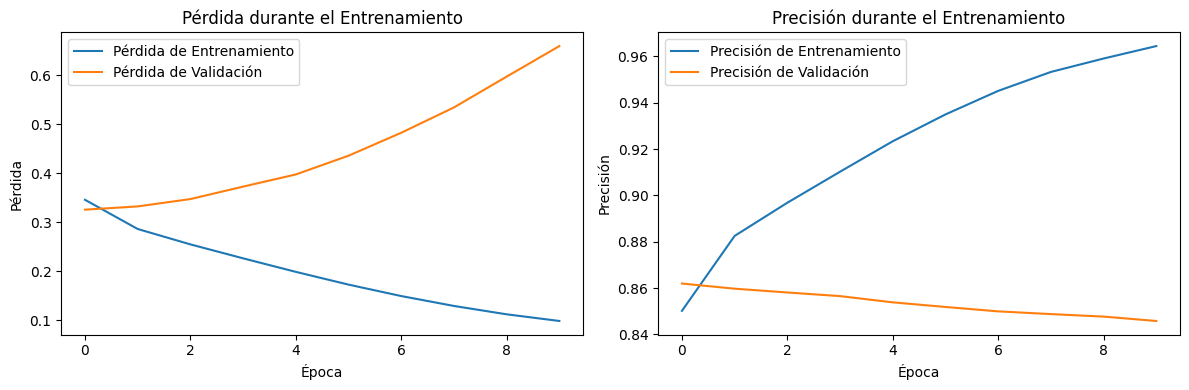

In [52]:
# Asegúrate de que tu modelo haya sido construido y compilado
# y de que tengas X_train, y_train disponibles.

# Entrena el modelo
# history contendrá información sobre el proceso de entrenamiento (pérdida y métricas por época).
# Puedes ajustar 'epochs' (número de pasadas por los datos de entrenamiento)
# y 'batch_size' (número de ejemplos procesados en cada actualización de pesos).
# validation_split reserva una parte de los datos de entrenamiento para validar el modelo
# al final de cada época, ayudando a detectar sobreajuste.
print("Iniciando el entrenamiento del modelo...")

history = model.fit(X_train, y_train,
                    epochs=10,         # Número de épocas de entrenamiento (ejecuta más si la precisión sigue mejorando)
                    batch_size=32,     # Tamaño del lote (puede ajustar este valor)
                    validation_split=0.2, # Porcentaje de datos de entrenamiento a usar para validación
                    verbose=1)         # Muestra el progreso del entrenamiento (1 = barra de progreso)

print("Entrenamiento completado.")

# Opcional: Visualizar el historial de entrenamiento
# Esto te permite ver cómo la pérdida y la precisión cambiaron durante las épocas.
import matplotlib.pyplot as plt

# Gráfico de Pérdida (Loss)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico de Precisión (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

**Explicación de los Pasos:**

1. **Método model.fit()**: Este es el método principal para entrenar un modelo en Keras.
* X_train: Los datos de entrada para el entrenamiento (tu matriz TF-IDF de entrenamiento).
* y_train: Las etiquetas correspondientes a los datos de entrada, (tu columna sentiment_binary de entrenamiento).
* epochs=10: El número de épocas. Una época es una pasada completa a través de todo el conjunto de datos de entrenamiento. Un número mayor de épocas permite al modelo aprender más, pero también puede llevar a sobreajuste, (el modelo aprende demasiado bien los datos de entrenamiento y no generaliza a datos nuevos). Puedes empezar con 10 o 20 y aumentarlo si ves que la precisión de validación sigue mejorando.
* batch_size=32: El tamaño del lote. El conjunto de datos de entrenamiento se divide en lotes. El modelo actualiza sus pesos después de procesar cada lote. Un batch_size más pequeño puede llevar a un entrenamiento más lento pero potencialmente a una mejor convergencia; un batch_size más grande acelera el entrenamiento pero puede requerir más memoria. 32 es un valor común para empezar.
* validation_split=0.2: Keras automáticamente separará el 20% de tus datos de X_train y y_train para usarlos como un conjunto de validación. Al final de cada época, el modelo se evaluará en este conjunto de validación. La pérdida y la precisión en el conjunto de validación son cruciales para detectar el sobreajuste: si la precisión de entrenamiento sigue subiendo pero la precisión de validación deja de mejorar o comienza a bajar, es una señal de sobreajuste.
* verbose=1: Muestra el progreso del entrenamiento en la consola, incluyendo la pérdida y las métricas de entrenamiento y validación para cada época.
2. **history Object**: El método fit() devuelve un objeto history, que contiene un registro de la pérdida y las métricas del modelo, para cada época durante el entrenamiento y la validación.
3. **Visualizar el Historial (Opcional pero Muy Recomendado)**:
* Importamos matplotlib.pyplot para graficar.
* Graficamos la pérdida de entrenamiento (history.history['loss']) y la pérdida de validación, (history.history['val_loss']), a lo largo de las épocas.
* Graficamos la precisión de entrenamiento (history.history['accuracy']) y la precisión de validación (history.history['val_accuracy']).
* Estos gráficos te dan una idea clara de cómo el modelo está aprendiendo y si está sobreajustándose. Idealmente, quieres ver que tanto la pérdida de entrenamiento como la de validación disminuyen, y que tanto la precisión de entrenamiento como la de validación aumentan, y que ambas curvas se mueven juntas. Una brecha creciente entre las curvas de entrenamiento y validación es una señal de sobreajuste.

Cuando ejecutes este código, verás la salida del entrenamiento época por época y, al finalizar, los gráficos que te ayudarán a entender el rendimiento del modelo durante el entrenamiento.

El último paso crucial es evaluar el modelo en el conjunto de prueba (X_test, y_test), datos que el modelo no ha visto en absoluto durante el entrenamiento, para tener una estimación realista de su rendimiento en datos nuevos.

El paso final en este ciclo inicial de modelado es evaluar tu red neuronal en el conjunto de prueba. Esto te dará una métrica objetiva de qué tan bien se espera que tu modelo funcione con datos completamente nuevos.

**Paso 5: Evaluar el Modelo**

Aquí tienes el código para evaluar el modelo entrenado en tus datos de prueba (X_test y y_test):

In [53]:
# Asegúrate de que el modelo haya sido entrenado
# y de que tengas X_test y y_test disponibles.

print("Iniciando la evaluación del modelo en el conjunto de prueba...")

# Evalúa el modelo en el conjunto de prueba
# model.evaluate() calcula la pérdida y las métricas (que especificaste en compile())
# para el conjunto de datos proporcionado.
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# Imprime los resultados de la evaluación
print(f"Pérdida en el conjunto de prueba: {loss:.4f}")
print(f"Precisión en el conjunto de prueba: {accuracy:.4f}")

# Opcional: Hacer predicciones con el modelo
# predictions = model.predict(X_test)
# print("\nAlgunas predicciones del modelo (probabilidades):")
# print(predictions[:10]) # Muestra las primeras 10 predicciones (probabilidades de ser clase 1)

# Para obtener las clases binarias (0 o 1) a partir de las probabilidades:
# predicted_classes = (predictions > 0.5).astype("int32")
# print("\nAlgunas predicciones del modelo (clases binarias):")
# print(predicted_classes[:10])

Iniciando la evaluación del modelo en el conjunto de prueba...
Pérdida en el conjunto de prueba: 0.6398
Precisión en el conjunto de prueba: 0.8477


**Explicación de los Pasos:**

1. **Método model.evaluate(**):
* model.evaluate(X_test, y_test, verbose=0): Este método evalúa el modelo entrenado utilizando el conjunto de prueba.
* X_test: Las características del conjunto de prueba.
* y_test: Las etiquetas verdaderas del conjunto de prueba.
* verbose=0: Suprime la salida detallada durante la evaluación (para que solo veas el resultado final que imprimimos). Puedes ponerlo en 1 si quieres ver el progreso de la evaluación.
* El método retorna la pérdida y los valores de las métricas que especificaste cuando compilaste el modelo (en este caso, loss y accuracy).
2. **Imprimir Resultados**: Imprimimos la pérdida y la precisión obtenidas en el conjunto de prueba.

* La **pérdida** indica qué tan bien se ajusta el modelo a los datos de prueba (un valor más bajo es mejor).
* La precisión indica la proporción de ejemplos en el conjunto de prueba que el modelo clasificó correctamente. Por ejemplo, una precisión de 0.85 significa que el modelo predijo la clase correcta para el 85% de las reseñas en el conjunto de prueba.
3. **Hacer Predicciones (Opcional)**: Las líneas comentadas muestran cómo puedes usar model.predict(X_test) para obtener las predicciones del modelo en el conjunto de prueba.
* Para un modelo de clasificación binaria, con activación sigmoide en la salida, model.predict() retorna las probabilidades de que cada ejemplo, pertenezca a la clase positiva (clase 1).
* Para convertir estas probabilidades a clases binarias (0 o 1), generalmente aplicas un umbral (comúnmente 0.5). Si la probabilidad es mayor que 0.5, predices la clase 1; de lo contrario, predices la clase 0. El código comentado muestra cómo hacer esto: (predictions > 0.5).astype("int32").
**Interpretación de los Resultados**:

* La **precisión en el conjunto de prueba** es una medida importante de qué tan bien se espera que tu modelo se desempeñe en datos nuevos y no vistos.
* Compara la precisión del conjunto de prueba con la precisión de entrenamiento y validación que viste en los gráficos del paso anterior.
* Si la precisión de prueba es significativamente menor que la precisión de validación, podría indicar que tu conjunto de validación no era completamente representativo del conjunto de prueba.
* Si tanto la precisión de validación como la de prueba son mucho más bajas que la precisión de entrenamiento, es una señal clara de sobreajuste: el modelo aprendió los datos de entrenamiento demasiado bien pero no generaliza a datos nuevos.
* Si la precisión de prueba es similar a la precisión de validación (y ambas son razonables), entonces el modelo parece estar generalizando bien.

La pérdida en el conjunto de prueba te da otra perspectiva del rendimiento del modelo en datos nuevos.

Hemos completado el ciclo básico de preprocesamiento, construcción, entrenamiento y evaluación de una red neuronal sencilla, para clasificación binaria utilizando tus datos de reseñas de software.

Ahora, basándote en los resultados de la evaluación y en los gráficos de entrenamiento, puedes decidir si estás satisfecho con el rendimiento o si necesitas iterar:

Si el rendimiento es aceptable: ¡Excelente! Puedes considerar este modelo como tu resultado.
Si el rendimiento no es el esperado: Puedes intentar mejorar el modelo haciendo ajustes como:
Cambiar la arquitectura de la red neuronal (añadir o quitar capas, cambiar el número de neuronas).
Ajustar los hiperparámetros de entrenamiento (tasa de aprendizaje, número de épocas, tamaño del lote).
Explorar otras técnicas de preprocesamiento o representación del texto (por ejemplo, diferentes parámetros de TF-IDF, o considerar incrustaciones de palabras como Word2Vec o GloVe si quieres ir más allá de la "sencilla").
Manejar el desbalance de clases si tu sentiment_binary.value_counts() mostró una gran diferencia entre 0s y 1s.